# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# To suppress warnings in Python code that uses the statsmodels library. 
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [2]:
hotel = pd.read_csv('INNHotelsGroup.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

### View the first and last 5 rows of the dataset

In [4]:
# returns the first 5 rows
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
# returns the last 5 rows
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

**Observations:**

Data includes information related to customer bookings. 

### Understand the shape of the dataset

In [6]:
# Returns the number of rows and Columns present in the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns in the given data.")

There are 36275 rows and 19 columns in the given data.


**Observations:**

The dataset consists of 36275 rows and 19 columns.

### Check the data types of the columns for the dataset

In [7]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations:**

The dataset contains 13 integer data types, 5 object data types, and 1 float data type, resulting in a total of 14 numerical and 5 categorical data types.

The count of non-null values remains the same as the total number of rows, indicating no missing values.

Memory usage of the dataset is 5.3+ MB KB.

In [8]:
# Returns Statistical summary of the data for Numerical Datatype
data.describe(exclude=[object]).T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

**Number of adults per booking:** The minimum and maximum values are 0 and 4, respectively.

**Number of children per booking:** The minimum and maximum values are 0 and 10, respectively, which is unusual and may require further analysis.

**Number of weeknights per booking:** The minimum and maximum values are 0 and 7, respectively, with 25% of bookings having 0 weeknight stays and 75% having 2 weeknight stays. The maximum value of 7 is higher than the 75th percentile of 2, indicating the possibility of outliers with unusually high values.

**Number of weekend nights per booking:** The minimum and maximum values are 0 and 17, respectively, with 25% of bookings having 1 weekend night stay and 75% having 3 weekend night stays. The maximum value of 17 is much higher than the 75th percentile of 3, suggesting the presence of outliers with extremely high values.

**Required car parking spaces per booking:**The variable is an indicator of whether the guest requires a parking space or not. 75% of guests do not require car parking space.

**Lead time:** The average lead time (number of days between booking and arrival) is around 85 days. The minimum and maximum lead times are 0 and 443 days, respectively, with 25% of bookings having a lead time of 17 days and 75% having a lead time of 126 days. There is a significant difference between the 75th percentile and the maximum value in some columns, suggesting the presence of outliers.

**Repeated Guest:**The variable is an indicator of whether the guest is a repeated guest or not. The minimum and maximum values are 0 and 1, respectively, with 75% of the customers being non-repeating guests.

**Year of arrival:** The minimum and maximum arrival years are 2017 and 2018, respectively. We have data for two years.

**Number of previous cancellations by the guest:** Range: 0 to 13. The majority of customers (75th percentile) have 0 cancellations in the past, with a maximum of 13 cancellations. There are some customers who have higher cancellation rates, possibly indicating a higher tendency to cancel bookings in the past.

**Number of previous bookings not canceled by the guest:** Range: 0 to 58. The majority of customers (75th percentile) have not canceled any previous bookings, with a maximum of 58 previous bookings not canceled.

**Average price per room for the booking:** Range: 0 to 540 EUR. The average price per room is 103.42 EUR. The 75th percentile value is 120, which means that 75% of customers have an average price per room of 120 EUR or less. However, there are some customers who have average prices per room above 120, with a maximum value of 540, indicating outliers.

**Number of special requests made by the guest:**Range: 0 to 5. The majority of customers (75th percentile) do not have any special requests, with a maximum of 5 special requests. There are some customers who have more special requests, possibly indicating higher demands or preferences for additional services or amenities.

In [9]:
# Returns Statistical summary of the data for object Datatype
data.describe(exclude=[np.number]).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

**Observations:**

Guests prefer Mean Plan 1 for meals, Room Type 1 for accommodations, and online booking for reservations. 

Most bookings are not cancelled, indicating a relatively stable booking status. 

**Missing and Duplicate values**

In [10]:
# Checking for duplicate values
data.duplicated().sum()

0

In [11]:
#Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**Observations:**

No Missing or Duplicate Values

**Let's drop the Booking_ID column first before we proceed forward**.

In [12]:
data = data.drop(["Booking_ID"], axis=1)

In [13]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [14]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

**Functions to plot Graphs for EDA**

In [15]:
def histogram_boxplot(data, feature,xlabel,ylabel,figsize=(15, 10), kde=True, bins=None,hist_edgecolor='black'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="khaki",meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},boxprops=dict(linewidth=1, edgecolor='black'),medianprops={"color": "black"},whiskerprops={'color': 'black', 'linewidth': 1},capprops={'color': 'black', 'linewidth': 1}
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    ax_box2.set_xlabel(xlabel)
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color='mediumseagreen',edgecolor=hist_edgecolor
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color='mediumseagreen',edgecolor=hist_edgecolor
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_xlabel(xlabel)
    ax_hist2.set_ylabel(ylabel)

In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 7))
    else:
        plt.figure(figsize=(n + 2, 7))


    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    
      
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis", edgecolor="black",
        order=data[feature].value_counts().index[:n],
    )
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 9),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [17]:
# Function to create Stacked Barplot
def stacked_barplot(data, predictor, target, Xlabel, ax=None):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    ax: AxesSubplot, optional
        The AxesSubplot to plot on. If not provided, a new subplot will be created.
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    if ax is None:
        ax = plt.gca()  # Get the current AxesSubplot if ax is not provided
    tab.plot(kind="bar", stacked=True, ax=ax,edgecolor="black",color=['mediumseagreen','salmon'])
    ax.set_xlabel(Xlabel, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend_ = None
    return ax



In [18]:
# Function to print the top 5 frequent values and their percentage,largest 5 values and their count, Maximum and Minimum value,Mean and Median of the column
def univariate_analysis(col, label):
    # Display the top 5 values and their percentages
    print(f"1.  The top 5 frequent {label} and their percentage")
    print(df[col].value_counts(normalize=True).nlargest(5) * 100)
    print()
    # Display the top 5 values
    print(f"2.  The Top 5 largest {label} values and their count")
    print(df[col].value_counts(normalize=True).sort_index(ascending=False).head(5)*100)
    print()
    # Display the maximum and minimum values
    print(f"3.  The Maximum of {label} is {df[col].max()}  and the Minimum of {label} is {df[col].min()} ")
    print()
    # Display the mean and median values
    print(f"4.  The Mean of {label} is {round(df[col].mean(), 2)}  and the Median of {label} is {df[col].median()} ")


In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target ,xlabel1,xlabel2):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="mediumseagreen",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="gold",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="mako")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="mako",
        showmeans=True
    )

    plt.tight_layout()
    plt.show()

**Univariate Analysis**

**Number of Adults**

In [20]:
df['no_of_adults'].value_counts(normalize=True)*100

2   71.97243
1   21.21296
3    6.38732
0    0.38318
4    0.04411
Name: no_of_adults, dtype: float64

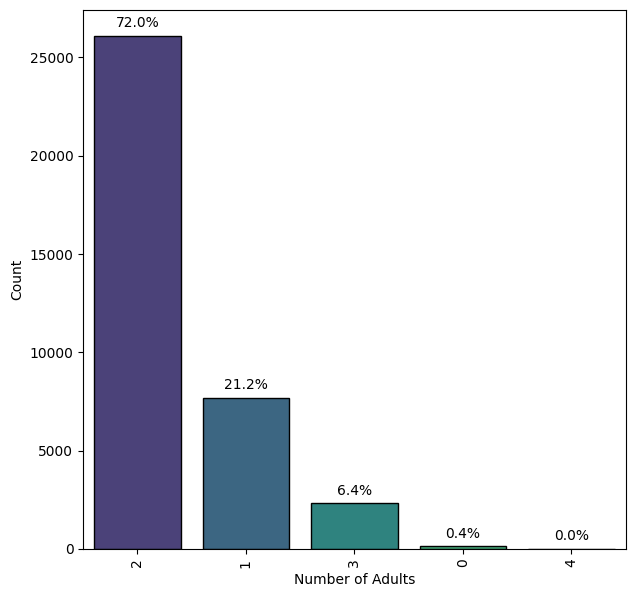

In [21]:
labeled_barplot(data=df, feature='no_of_adults', xlabel='Number of Adults', ylabel='Count',perc=True)

**Observations:**
Approximately 72% of the bookings are made for two adults.

**Number of Children**

In [22]:
df['no_of_children'].value_counts(normalize=True)*100

0    92.56237
1     4.46037
2     2.91661
3     0.05238
9     0.00551
10    0.00276
Name: no_of_children, dtype: float64

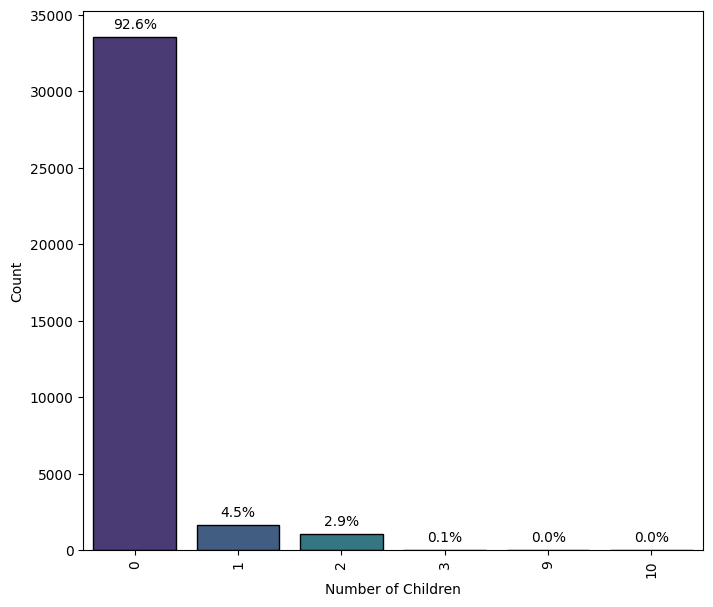

In [23]:
labeled_barplot(data=df, feature='no_of_children', xlabel='Number of Children', ylabel='Count',perc=True)

**Observations:**
Roughly 92% of the bookings did not include children. However, there are a few bookings with child counts of 9 and 10, which require further analysis of the data.

**Children count > 3**

In [24]:
df[(df['no_of_children']==9) | (df['no_of_children']==10)]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0            84.45000   
10041                                     0            95.00000   
10061                                     0            76.50000   

       no_of_special_requests booking_status  
6338                        1   Not_Canceled  
10041                       0   Not_Canceled  
10061                       1       Canceled

In [25]:
# replacing 9, and 10 children with 3
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)

**Children Not Accompanied by Adults**

There are instances where children have made bookings without being accompanied by adults. This observation may require further analysis to understand the reasons behind it and to ensure compliance with relevant policies or regulations.

In [26]:
df[(df['no_of_children'] > 0) & (df['no_of_adults'] ==0)].shape

(139, 18)

**Number of weekend nights**

In [27]:
df['no_of_weekend_nights'].value_counts(normalize=True)*100

0   46.51137
1   27.55341
2   25.00620
3    0.42178
4    0.35562
5    0.09373
6    0.05513
7    0.00276
Name: no_of_weekend_nights, dtype: float64

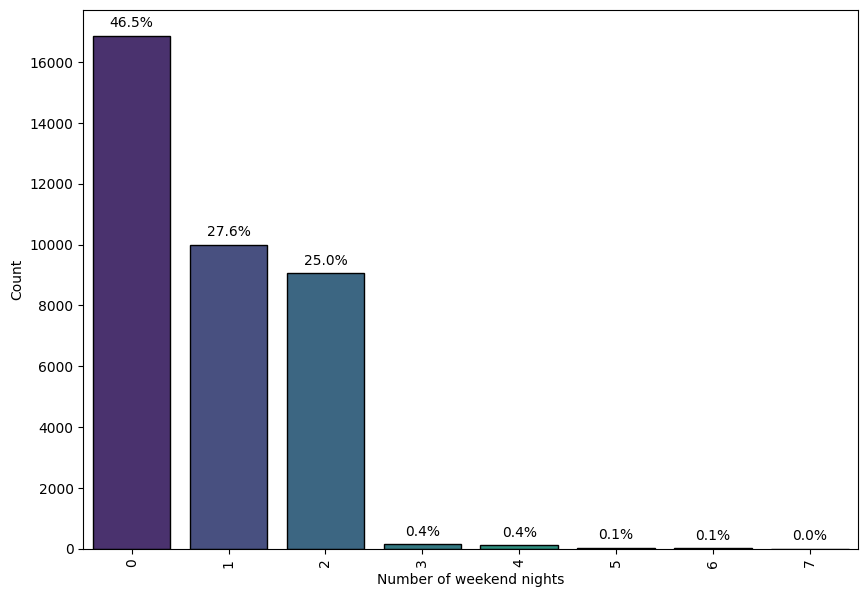

In [28]:
labeled_barplot(data=df, feature='no_of_weekend_nights', xlabel='Number of weekend nights', ylabel='Count',perc=True)

**Observations:**
Approximately 46% of bookings are not made for weekend nights, which typically include a one- or two-day stay.

**Number of week nights**

In [29]:
(df['no_of_week_nights']> 5).value_counts(normalize=True)*100

False   98.58580
True     1.41420
Name: no_of_week_nights, dtype: float64

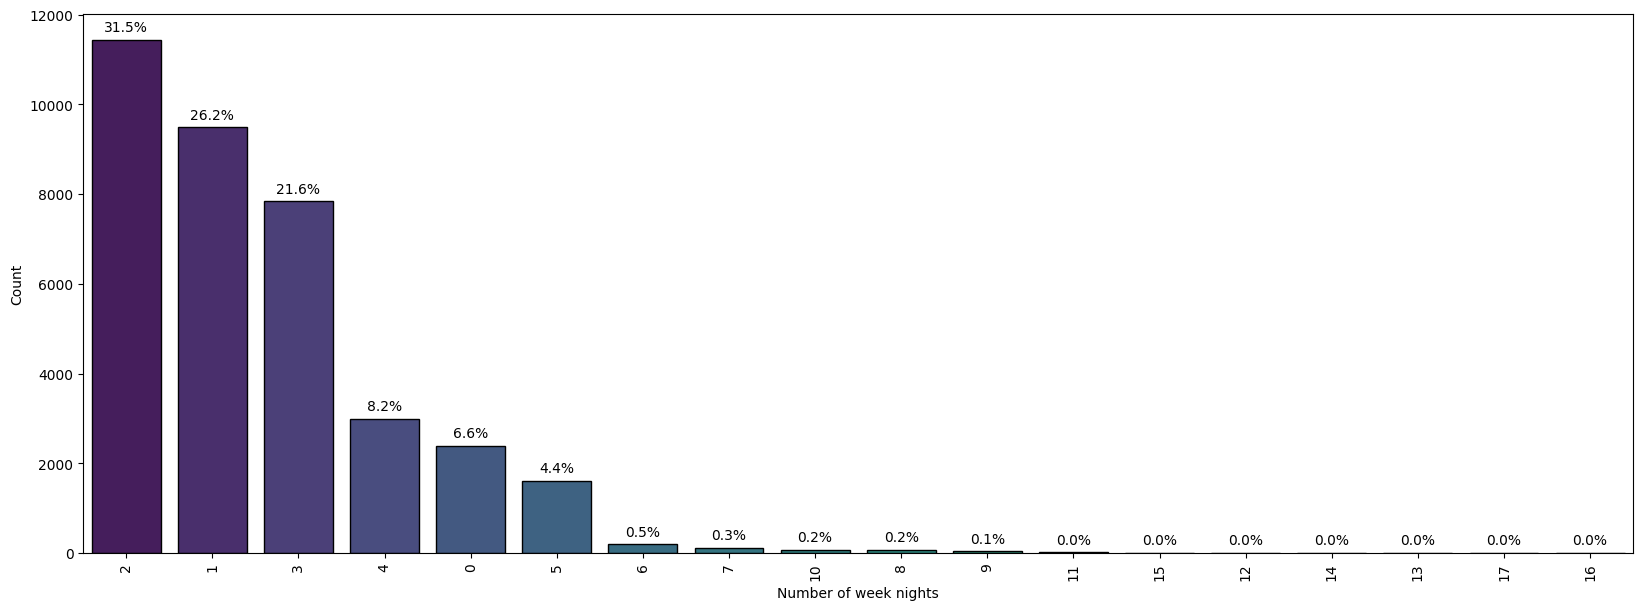

In [30]:
labeled_barplot(data=df, feature='no_of_week_nights', xlabel='Number of week nights', ylabel='Count',perc=True)

**Observations:**

The majority of bookings are made for 2 days of week nights, followed by 1 day of week night stays. 

Only approximately 1.5% of bookings are made for week night stays longer than 5 days.


**Type of meal plan**

In [31]:
df['type_of_meal_plan'].value_counts(normalize=True)*100

Meal Plan 1    76.73329
Not Selected   14.14197
Meal Plan 2     9.11096
Meal Plan 3     0.01378
Name: type_of_meal_plan, dtype: float64

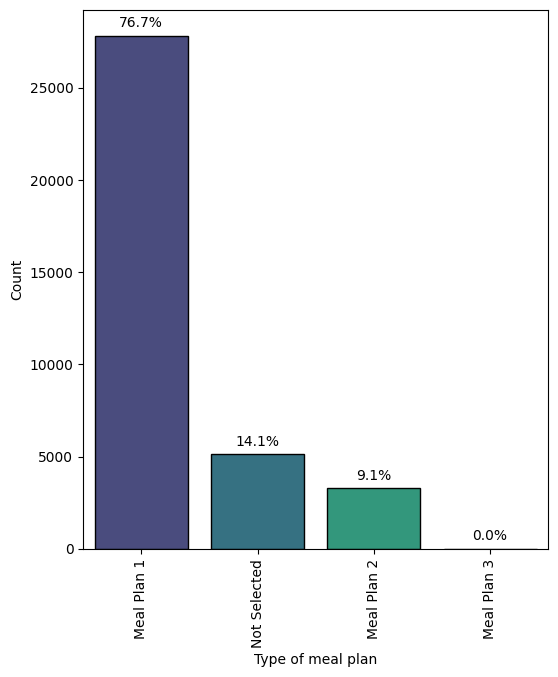

In [32]:
labeled_barplot(data=df, feature='type_of_meal_plan', xlabel='Type of meal plan', ylabel='Count',perc=True)

**Observations:** Approximately 76% of guests prefer Meal Plan 1, while 14% of guests do not select any meal plan.

**Requirement for car parking**

In [33]:
df['required_car_parking_space'].value_counts(normalize=True)*100

0   96.90145
1    3.09855
Name: required_car_parking_space, dtype: float64

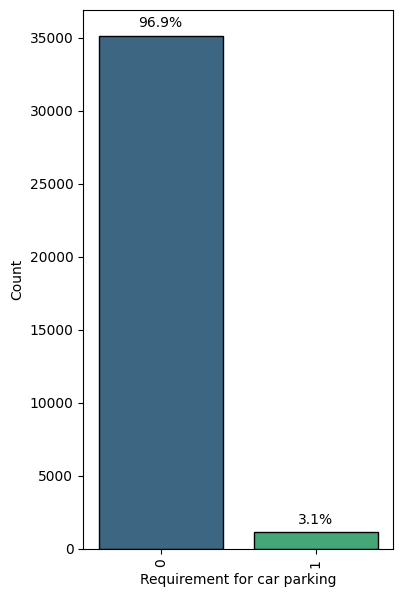

In [34]:
labeled_barplot(data=df, feature='required_car_parking_space', xlabel='Requirement for car parking', ylabel='Count',perc=True)

**Observations:** Approximately 97% of people don't require car parking.

**Type of room reserved**

In [35]:
df['room_type_reserved'].value_counts(normalize=True)*100

Room_Type 1   77.54652
Room_Type 4   16.69745
Room_Type 6    2.66299
Room_Type 2    1.90765
Room_Type 5    0.73053
Room_Type 7    0.43556
Room_Type 3    0.01930
Name: room_type_reserved, dtype: float64

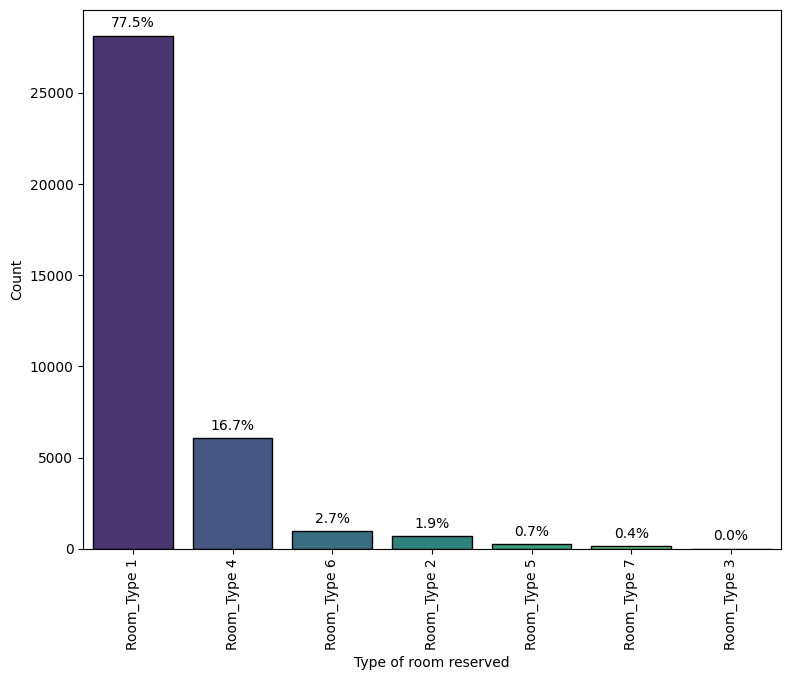

In [36]:
labeled_barplot(data=df, feature='room_type_reserved', xlabel='Type of room reserved', ylabel='Count',perc=True)

**Observations:**
Approximately 77% of guests prefer Room Type 1, followed by Room Type 4. Fewer people prefer other room types.

**Year of arrival date**

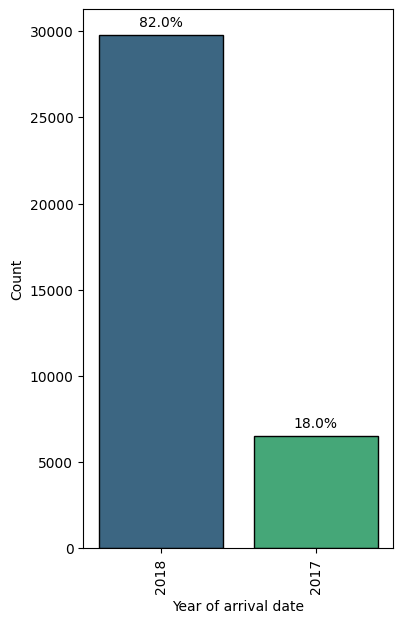

In [37]:
labeled_barplot(data=df, feature='arrival_year', xlabel='Year of arrival date', ylabel='Count',perc=True)

**Observations:**
The majority of the observed data pertains to the year 2018.

**Month of arrival**

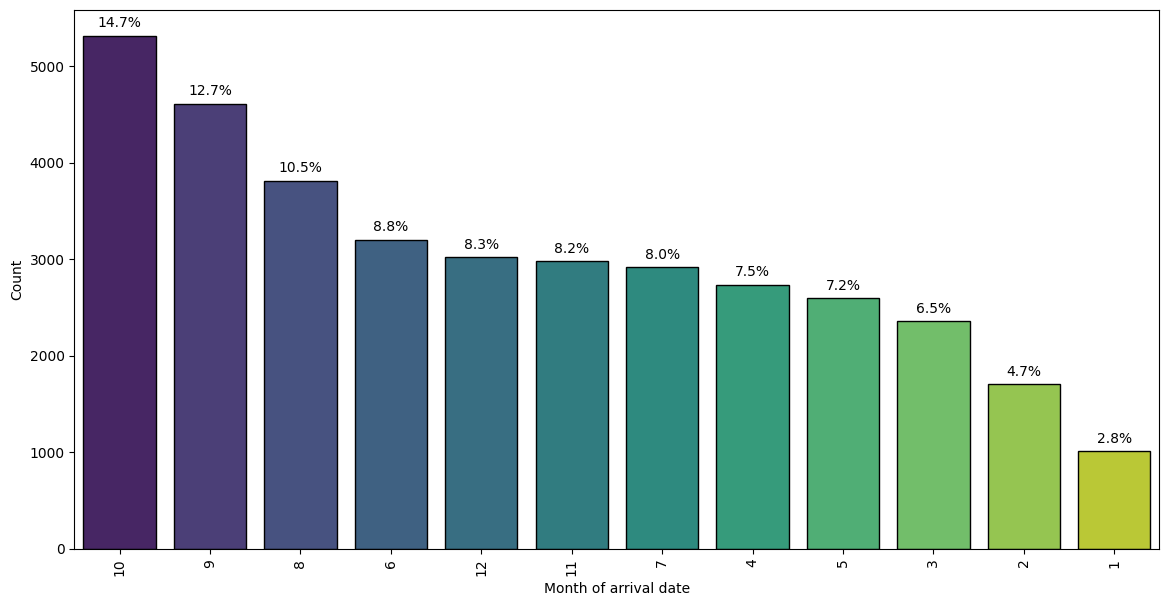

In [38]:
labeled_barplot(data=df, feature='arrival_month', xlabel='Month of arrival date', ylabel='Count',perc=True)

**Observations:**
The months of October and September, followed by August, have the highest number of bookings, making them the busiest months for bookings. The months immediately before and after the peak booking season show moderate booking activity.



**Date of the month**

In [39]:
df['arrival_date'].value_counts(normalize=True)*100

13   3.74363
17   3.70779
2    3.66919
4    3.65817
19   3.65817
16   3.60028
20   3.53136
15   3.50930
6    3.50930
18   3.47347
14   3.42385
30   3.35217
12   3.31909
8    3.30255
29   3.28050
21   3.19228
5    3.18125
26   3.15920
25   3.15920
1    3.12336
9    3.11509
28   3.11234
7    3.05996
24   3.04066
11   3.02688
3    3.02688
10   3.00207
27   2.91937
22   2.82012
23   2.72915
31   1.59338
Name: arrival_date, dtype: float64

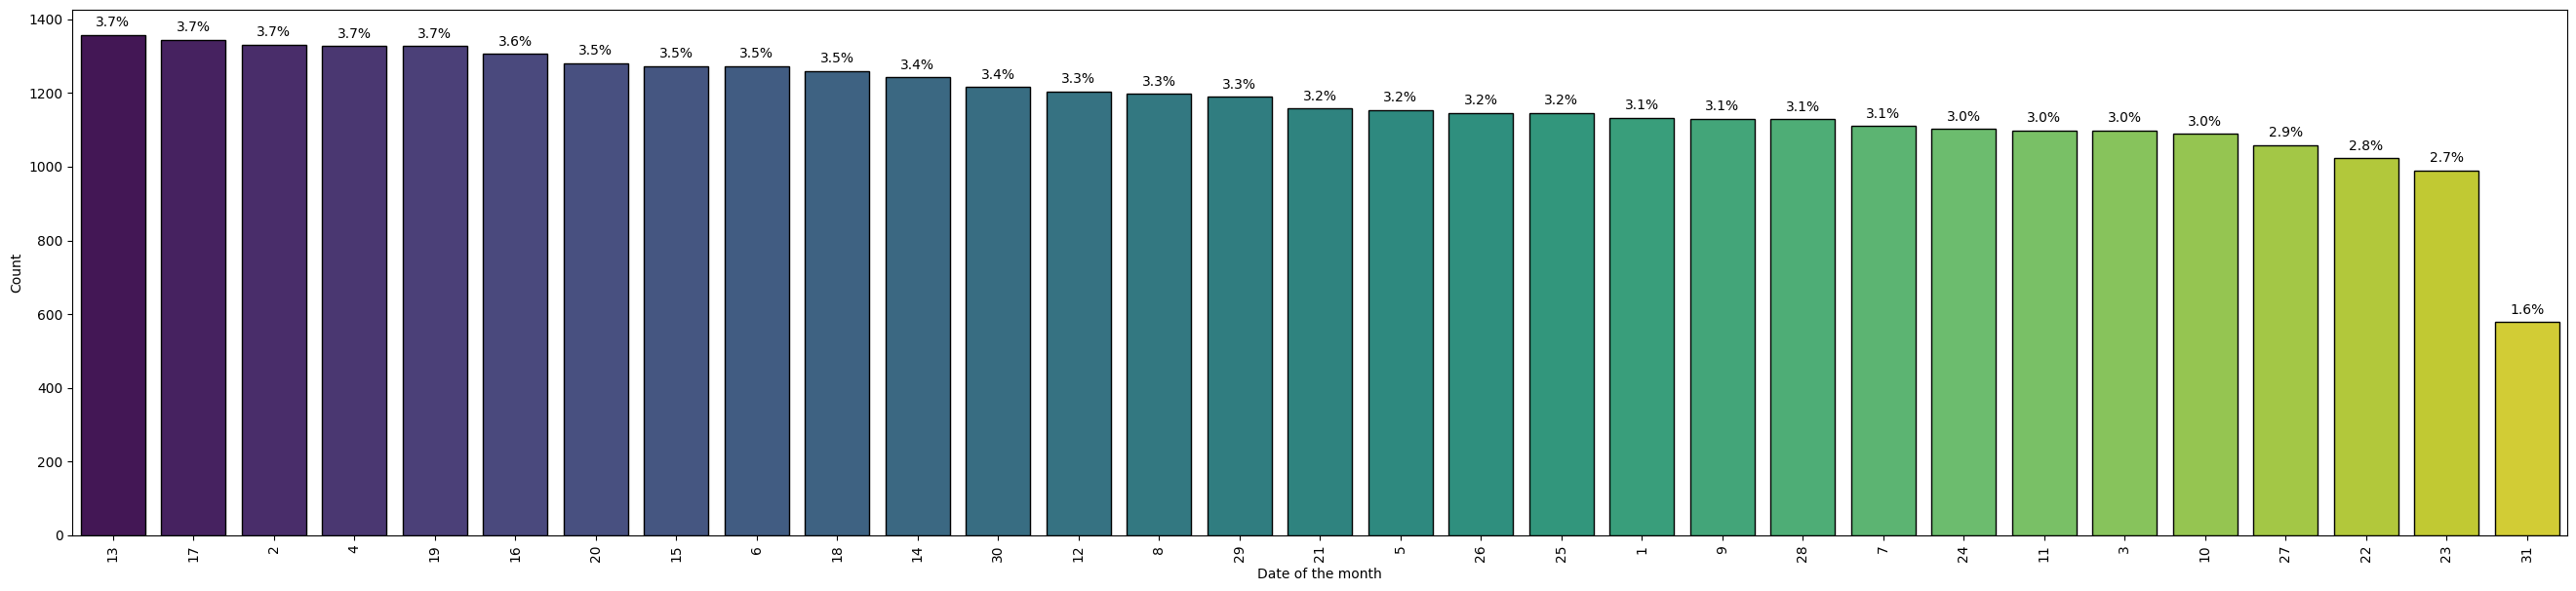

In [40]:
labeled_barplot(data=df, feature='arrival_date', xlabel='Date of the month', ylabel='Count',perc=True)

**Observations:**
The booking percentages for most days of the month are relatively similar, with values ranging from approximately 3.0% to 3.7%. There are no significant variations or trends observed among the days of the month.

**Market segment designation**

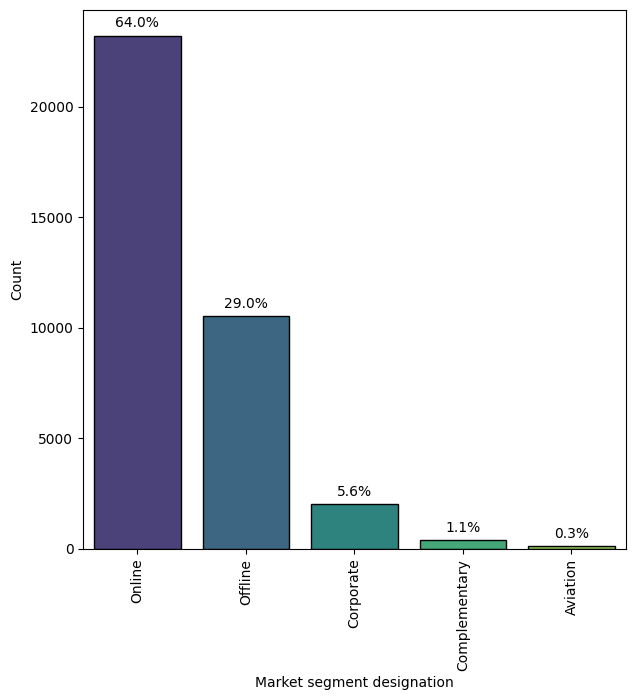

In [41]:
labeled_barplot(data=df, feature='market_segment_type', xlabel='Market segment designation', ylabel='Count',perc=True)

**Observations:**

Approximately 64% of the bookings are made online, while 29% are made offline.

Corporate bookings account for approximately 5.6% of the total bookings.

Around 1.1% of the bookings are made for complementary purposes.

Bookings from the aviation sector constitute only 0.3% of the total bookings.

**Repeated Guest**

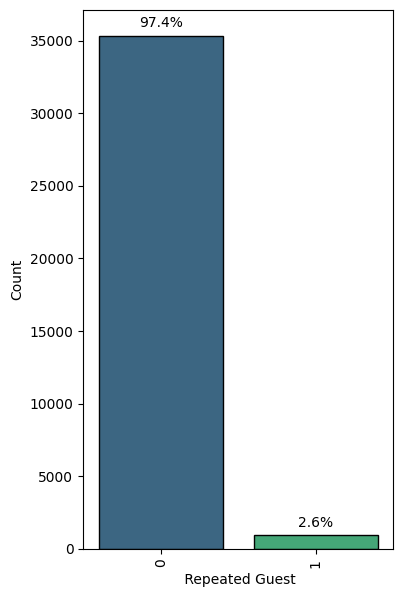

In [42]:
labeled_barplot(data=df, feature='repeated_guest', xlabel=' Repeated Guest', ylabel='Count',perc=True)

**Observations:**

Majority of the guests, approximately 97.4%, are new guests, while only a small percentage of approximately 2.6% are repeat guests. This suggests that the hotel has a high rate of new guest bookings, with a relatively low percentage of repeat guests.

**Total number of special requests made by the customer**

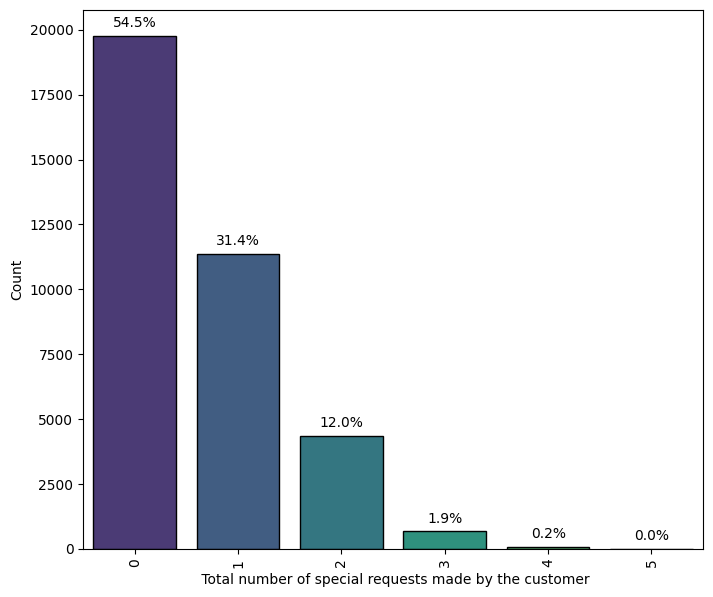

In [43]:
labeled_barplot(data=df, feature='no_of_special_requests', xlabel=' Total number of special requests made by the customer', ylabel='Count',perc=True)

**Observations:**

Approximately 54.5% of the total guests do not make any special requests, while about 43% of guests make 1-2 special requests.
 
This suggests that a majority of guests do not have any special requirements or preferences during their stay, while a significant portion makes a moderate number of special requests.

**Booking Status**

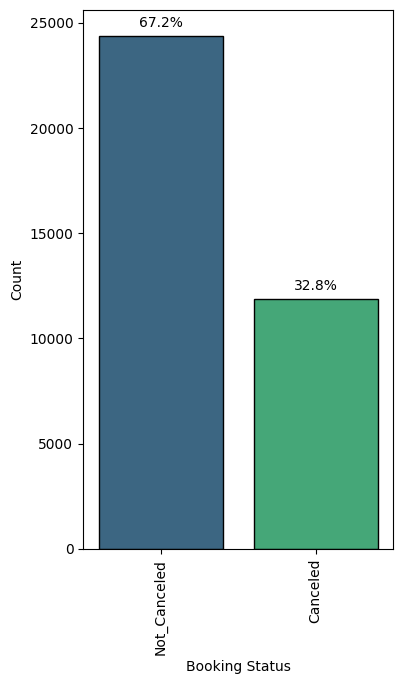

In [44]:
labeled_barplot(data=df, feature='booking_status', xlabel='Booking Status', ylabel='Count',perc=True)

**Observations:**

Around 67% of the bookings are not cancelled but 33% of them are cancelled.

Majority of the bookings are confirmed and not cancelled, while a significant portion of bookings are cancelled by the guests. 

**Lead Time**

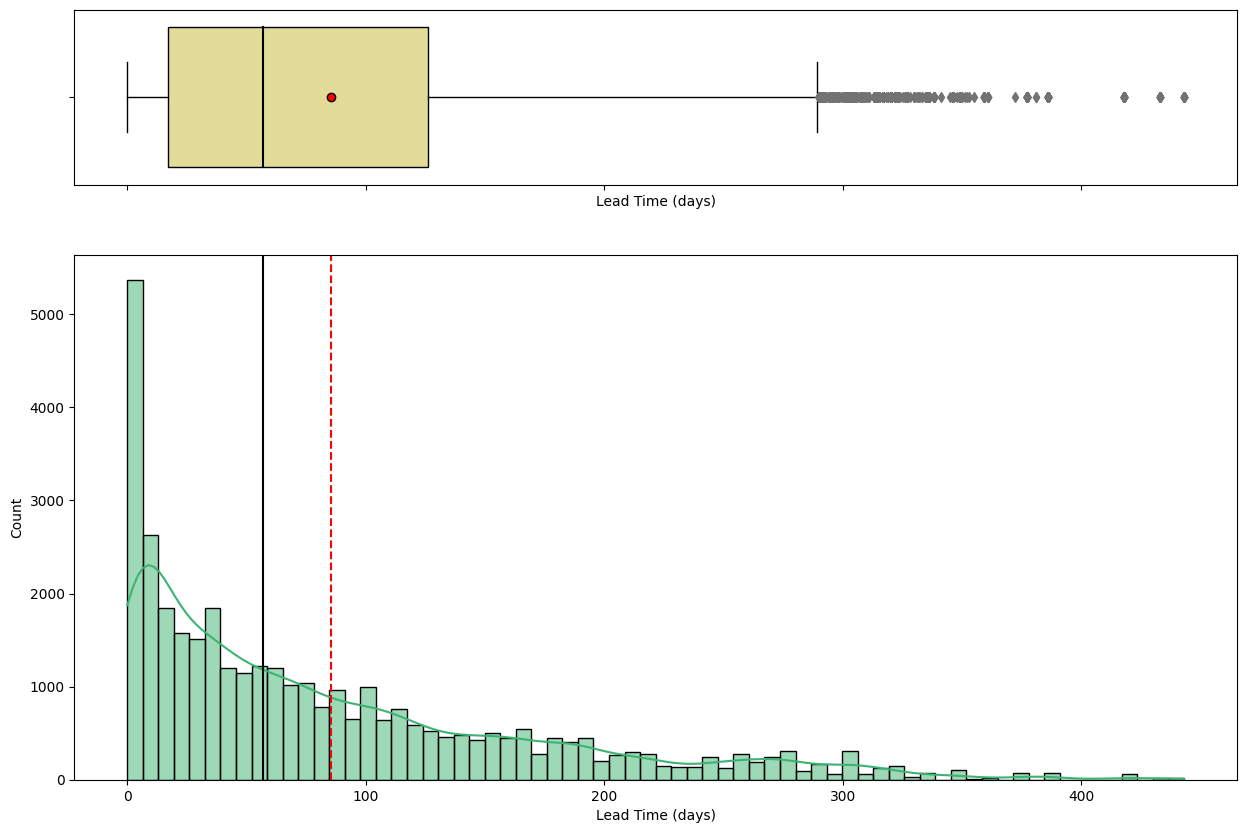

In [45]:
histogram_boxplot(data=df,feature="lead_time",xlabel='Lead Time (days)', ylabel='Count')

**Observations:**

Distribution of lead time is right-skewed, indicating that most bookings are made closer to the arrival date. 

There are also a significant number of outliers where customers have made bookings around 300-500 days in advance, indicating long-term planning or advance bookings for special events or occasions.

Some customers have made bookings on the same day of arrival, indicating last-minute bookings or spontaneous travel plans.

Range of Lead Time is from 0 to 500 days indicating there is a wide range of lead times for bookings, with some guests planning well in advance and others making last-minute bookings.

**Number of previous bookings that were canceled**

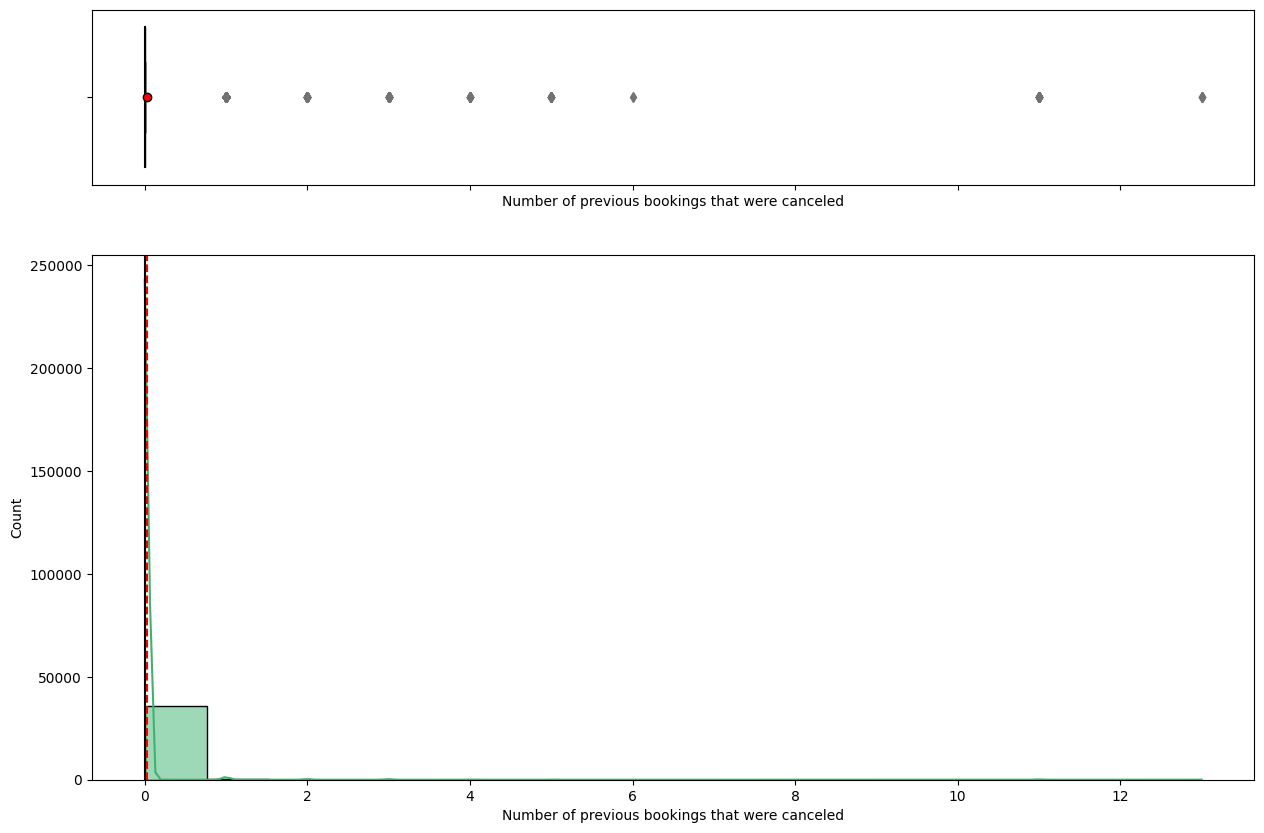

In [46]:
histogram_boxplot(data=df,feature="no_of_previous_cancellations",xlabel='Number of previous bookings that were canceled', ylabel='Count')

In [47]:
# Call the univariate_analysis function
univariate_analysis('no_of_previous_cancellations', 'Number of previous bookings that were canceled')

1.  The top 5 frequent Number of previous bookings that were canceled and their percentage
0    99.06823
1     0.54583
2     0.12681
3     0.11854
11    0.06892
Name: no_of_previous_cancellations, dtype: float64

2.  The Top 5 largest Number of previous bookings that were canceled values and their count
13   0.01103
11   0.06892
6    0.00276
5    0.03032
4    0.02757
Name: no_of_previous_cancellations, dtype: float64

3.  The Maximum of Number of previous bookings that were canceled is 13  and the Minimum of Number of previous bookings that were canceled is 0 

4.  The Mean of Number of previous bookings that were canceled is 0.02  and the Median of Number of previous bookings that were canceled is 0.0 


**Observations:**

Majority of guests (99%) have not cancelled any of their previous bookings, indicating a high rate of booking reliability and guest satisfaction.

Only 1% of guests have previously cancelled bookings, which suggests a relatively low rate of cancellations overall.

However, it is worth noting that a small percentage of guests (1%) have cancelled bookings multiple times, with some guests cancelling up to 13 times their previous bookings.

**Number of previous bookings not canceled**

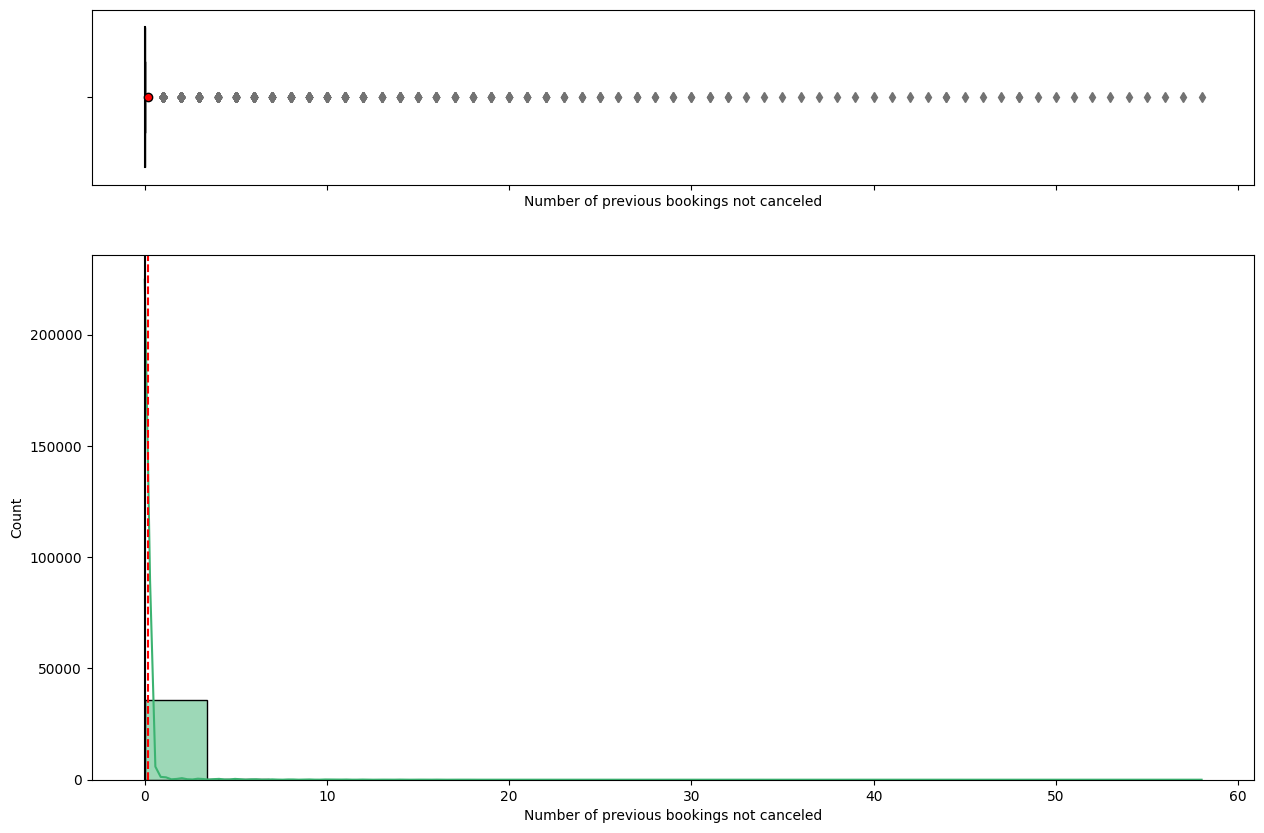

In [48]:
histogram_boxplot(data=df,feature="no_of_previous_bookings_not_canceled",xlabel='Number of previous bookings not canceled', ylabel='Count')

In [49]:
# Call the univariate_analysis function
univariate_analysis('no_of_previous_bookings_not_canceled', 'Number of previous bookings not canceled')

1.  The top 5 frequent Number of previous bookings not canceled and their percentage
0   97.76154
1    0.62853
2    0.30875
3    0.22054
4    0.17919
Name: no_of_previous_bookings_not_canceled, dtype: float64

2.  The Top 5 largest Number of previous bookings not canceled values and their count
58   0.00276
57   0.00276
56   0.00276
55   0.00276
54   0.00276
Name: no_of_previous_bookings_not_canceled, dtype: float64

3.  The Maximum of Number of previous bookings not canceled is 58  and the Minimum of Number of previous bookings not canceled is 0 

4.  The Mean of Number of previous bookings not canceled is 0.15  and the Median of Number of previous bookings not canceled is 0.0 


**Observations:**

Majority of customers have not cancelled any of their previous bookings followed by a small percentage of customers who have cancelled their bookings once . 

There are very few customers who have multiple bookings that were not previously cancelled.

**Average Price on Room**

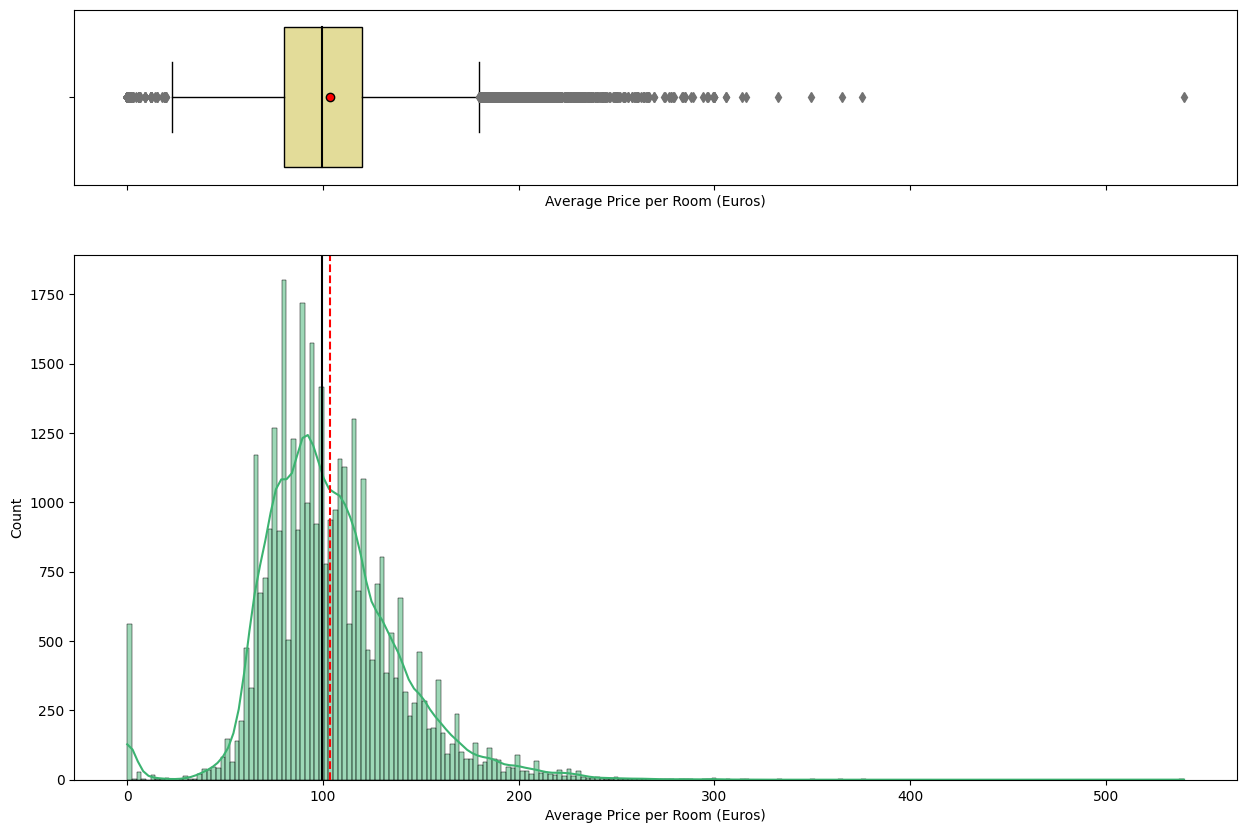

In [50]:
histogram_boxplot(data=df,feature="avg_price_per_room",xlabel='Average Price per Room (Euros)', ylabel='Count')

**Observations:**

Distribution of the average price per room is skewed to the right, with outliers present on both the higher and lower ends of the price range. 

The majority of rooms have an average price around 100 EUR.

However, there is one observation where the average price per room is more than 500 euros, which is significantly higher than the rest of the values. Instead of dropping this observation, it is suggested to clip it to the upper whisker to retain the information.

Furthermore, there are some rooms with an average price per room equal to 0 and require further analysis.

In [51]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [52]:
# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

In [53]:
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations**

The observation with an average price per room higher than 500 EUR is clipped to its upper whisker (179.55 EUR).

Presence of 0 EUR for average price per room in 354 entries could be due to complementary bookings or management activities. Further investigation is needed to understand the reasons behind these 0 EUR in online market Segment type should be analyzed further.

**Heat Map and Correlation Table**

In [54]:
#Assigning 1 for Canceled Booking status and 0 for Not Canceled Booking status for Target Variable Analysis
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [55]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

In [56]:
df[cols_list].corr()

no_of_adults  no_of_children  \
no_of_adults                               1.00000        -0.01978   
no_of_children                            -0.01978         1.00000   
no_of_weekend_nights                       0.10332         0.02938   
no_of_week_nights                          0.10562         0.02449   
required_car_parking_space                 0.01143         0.03517   
lead_time                                  0.09729        -0.04703   
arrival_year                               0.07672         0.04848   
arrival_month                              0.02184        -0.00255   
arrival_date                               0.02634         0.02654   
repeated_guest                            -0.19228        -0.03687   
no_of_previous_cancellations              -0.04743        -0.01664   
no_of_previous_bookings_not_canceled      -0.11917        -0.02150   
avg_price_per_room                         0.29742         0.34604   
no_of_special_requests                     0.18940         0.12690   
booking_status                             0.08692         0.03378   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                       0.10332            0.10562   
no_of_children                                     0.02938            0.02449   
no_of_weekend_nights                               1.00000            0.17958   
no_of_week_nights                                  0.17958            1.00000   
required_car_parking_space                        -0.03111           -0.04878   
lead_time                                          0.04660            0.14965   
arrival_year                                       0.05536            0.03267   
arrival_month                                     -0.00989            0.03738   
arrival_date                                       0.02730           -0.00930   
repeated_guest                                    -0.06711           -0.09976   
no_of_previous_cancellations                      -0.02069           -0.03008   
no_of_previous_bookings_not_canceled              -0.02631           -0.04934   
avg_price_per_room                                -0.00427            0.02304   
no_of_special_requests                             0.06059            0.04599   
booking_status                                     0.06156            0.09300   

                                      required_car_parking_space  lead_time  \
no_of_adults                                             0.01143    0.09729   
no_of_children                                           0.03517   -0.04703   
no_of_weekend_nights                                    -0.03111    0.04660   
no_of_week_nights                                       -0.04878    0.14965   
required_car_parking_space                               1.00000   -0.06644   
lead_time                                               -0.06644    1.00000   
arrival_year                                             0.01568    0.14344   
arrival_month                                           -0.01550    0.13681   
arrival_date                                            -0.00004    0.00648   
repeated_guest                                           0.11091   -0.13598   
no_of_previous_cancellations                             0.02711   -0.04572   
no_of_previous_bookings_not_canceled                     0.06381   -0.07814   
avg_price_per_room                                       0.06148   -0.06256   
no_of_special_requests                                   0.08792   -0.10164   
booking_status                                          -0.08619    0.43854   

                                      arrival_year  arrival_month  \
no_of_adults                               0.07672        0.02184   
no_of_children                             0.04848       -0.00255   
no_of_weekend_nights                       0.05536       -0.00989   
no_of_week_nights                          0.03267        0.03738   
required_c

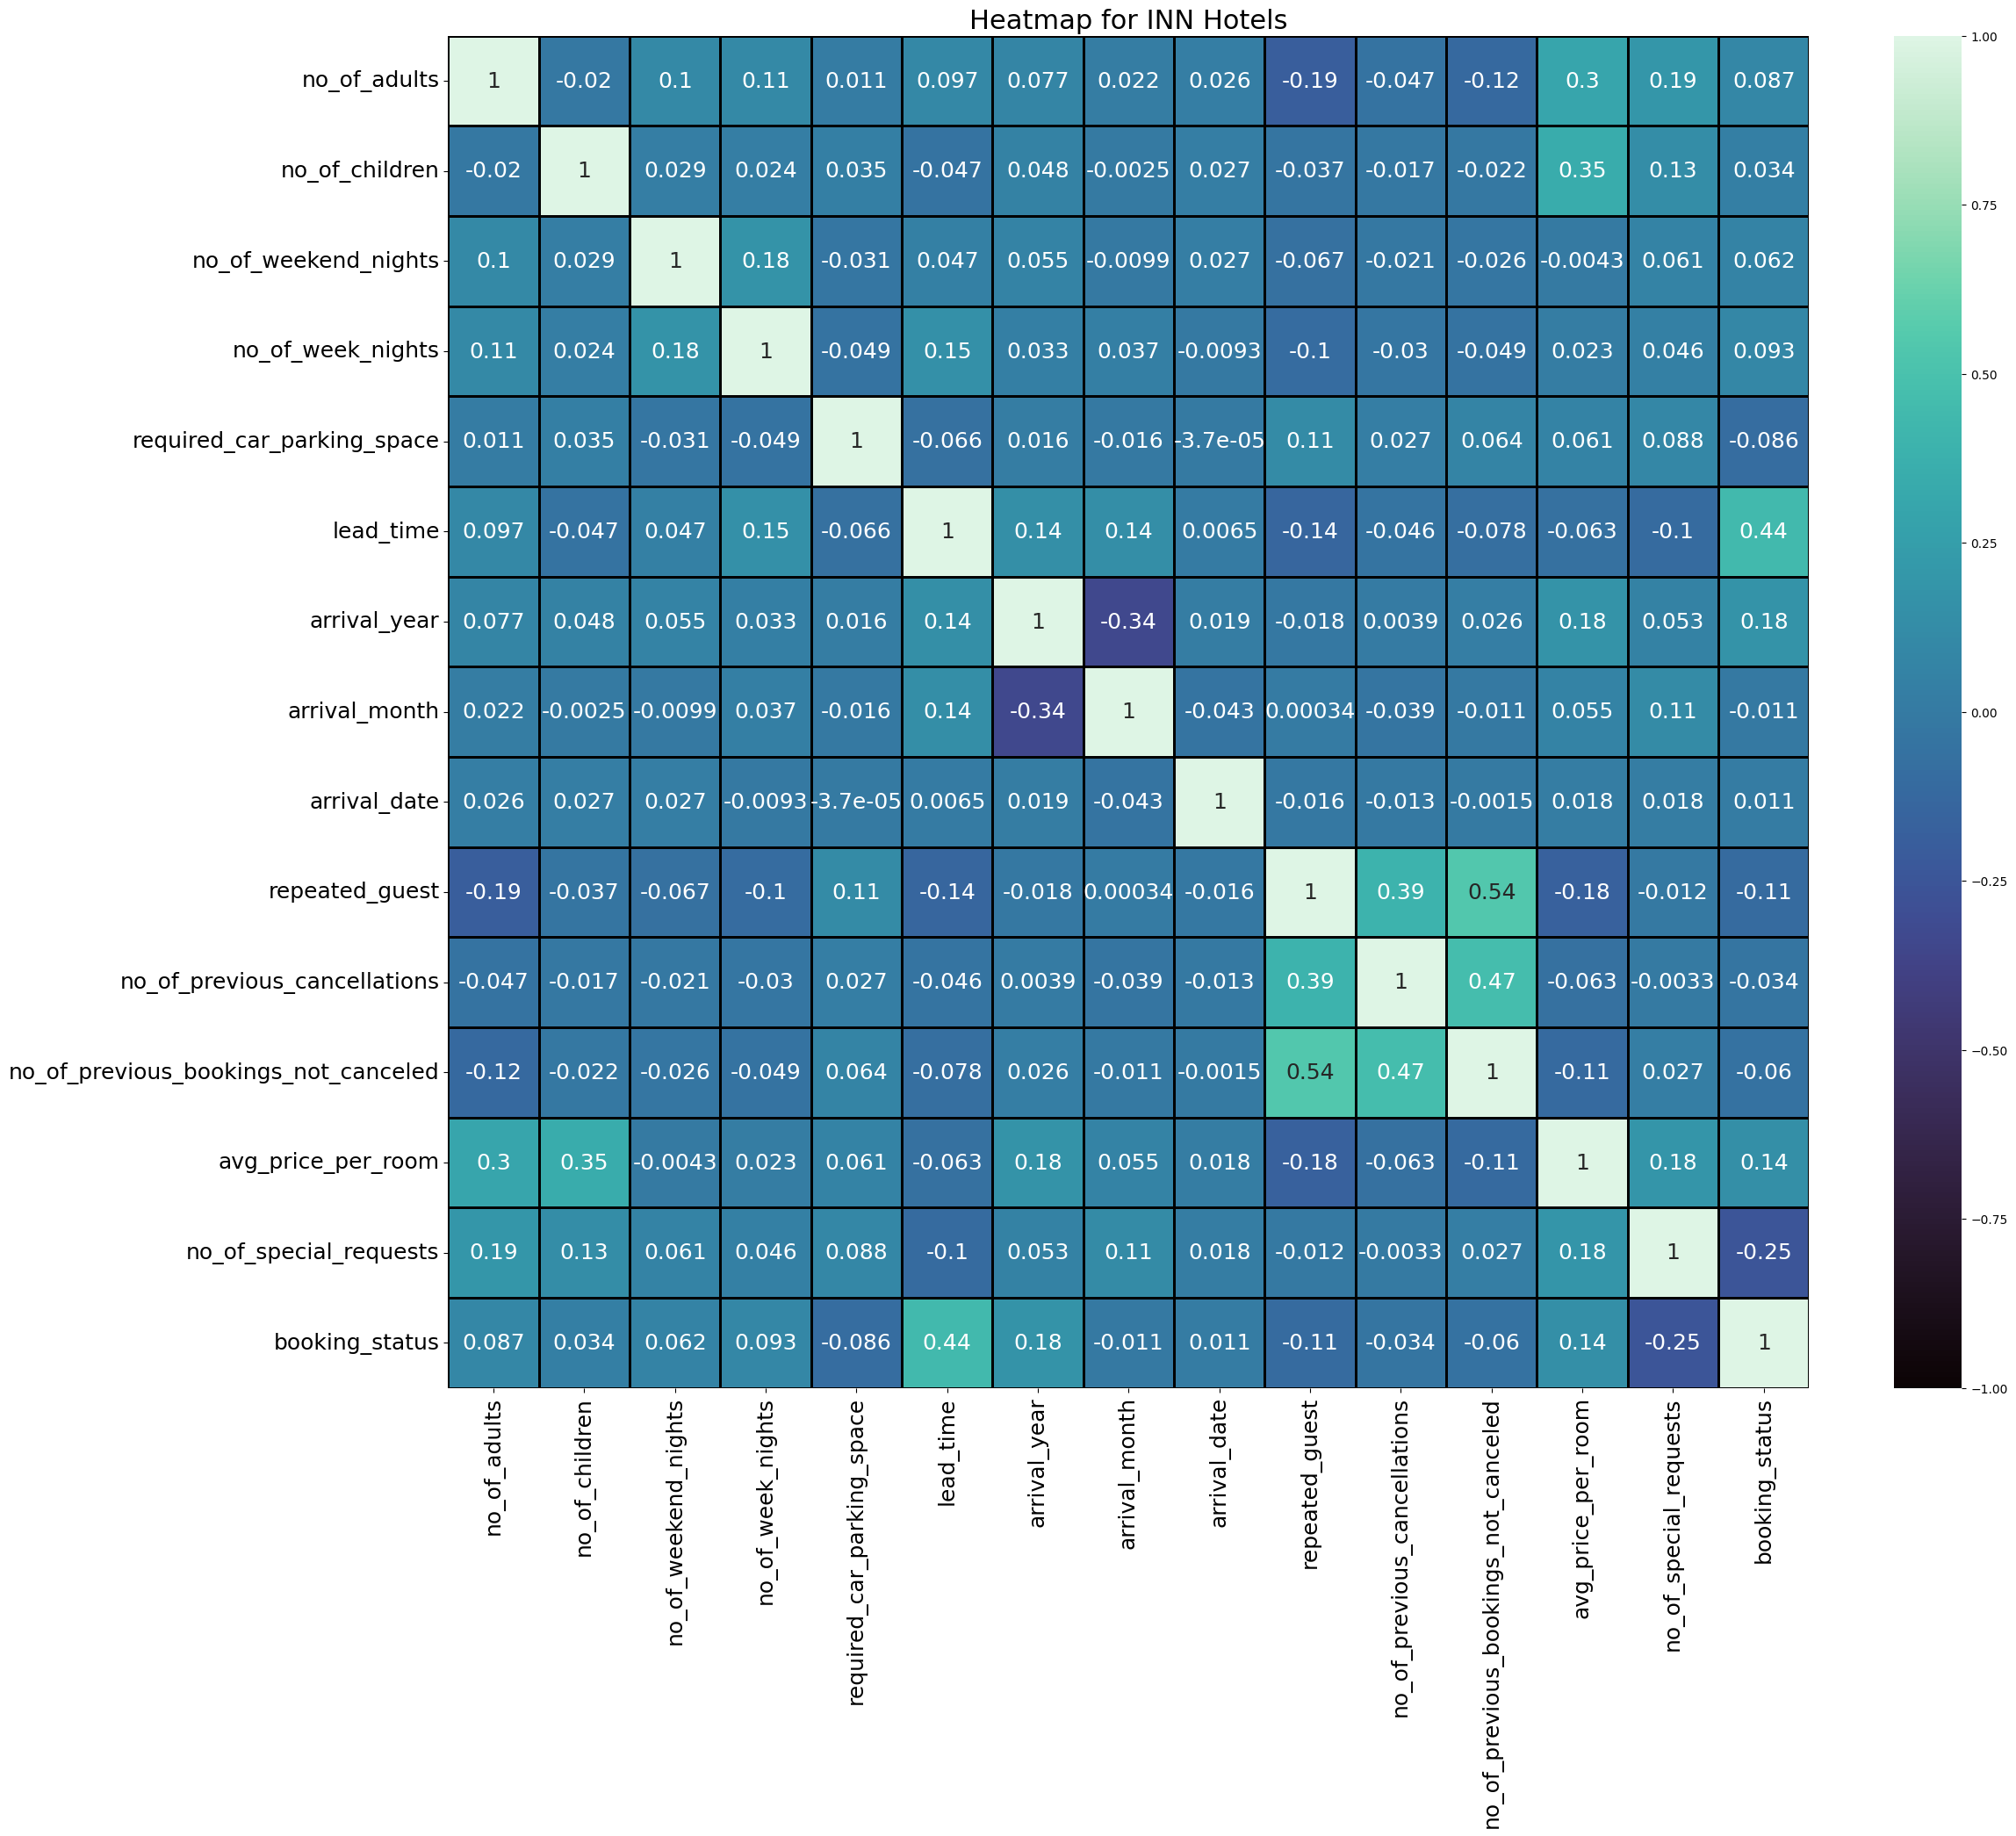

In [57]:
plt.figure(figsize=(25,20))
hmap=sns.heatmap(df[cols_list].corr(),annot=True,cmap='mako',vmin=-1,vmax=1,linecolor='black',linewidths=2,annot_kws={'fontsize':18});
hmap.set_title('Heatmap for INN Hotels',fontsize=22)
hmap.set_xticklabels(hmap.get_xticklabels(), fontsize=18)
hmap.set_yticklabels(hmap.get_yticklabels(), fontsize=18)
plt.show()

**Observations:**

**Number of Adults:**

Positive correlation - As the number of adults increases, there is a tendency for the number of weekend nights, week nights, lead time, and average price per room to also increase. Additionally, the number of special requests made also tends to increase.

Negative correlation - With an increase in the number of adults, the likelihood of being a repeated guest and the chances of booking cancellation tend to decrease.

**Number of Children:**

Positive correlation - As the number of children increases, the average price per room and the number of special requests made also tends to increase.

**Number of Weekend Nights:**

Positive correlation - As the number of weekend nights increases, there is a tendency for the number of week nights to also increase.

**Number of Weekday Nights:**

Positive correlation - As the number of weekday nights increases, there is a tendency for the lead time to also increase.

**Lead Time:**

Positive correlation - As the lead time increases, the chances of booking cancellation also tends to increase.

**Average Price Per Room:**

Positive correlation - As the average price per room increases, the number of special requests made and the chances of booking cancellation also tends to increase.

Negative correlation - Repeated guests have a lower average price per room compared to others, which may indicate discounts provided for repeated customers.

**Repeated Customers:**

Positive correlation - Repeated customers tend to have a history of both canceled and non-canceled bookings.

**Special Requests:**

Negative correlation - As the number of special requests increases, the chances of booking cancellation tends to decrease.

**Multivariate Analysis**

**Booking Status - Target Variable Analysis**

**Books Status vs. Average Price**

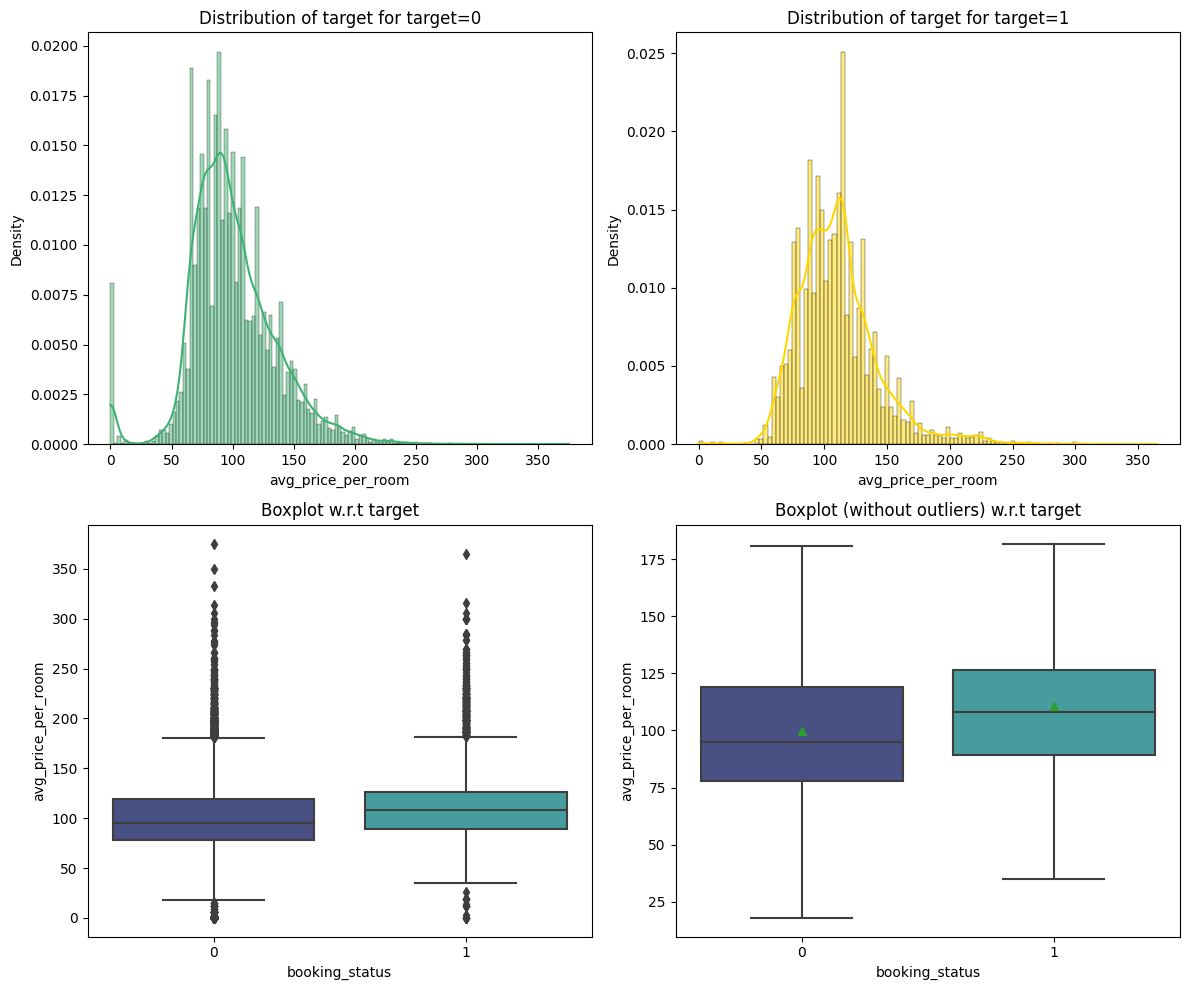

In [58]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status",xlabel1="Average Price Per Room",xlabel2="Booking status")

**Observations:**

The distribution of price for canceled bookings and not canceled bookings is quite similar.

The prices for the canceled bookings are slightly higher than the bookings which were not canceled.

**Books Status vs. Lead Time**

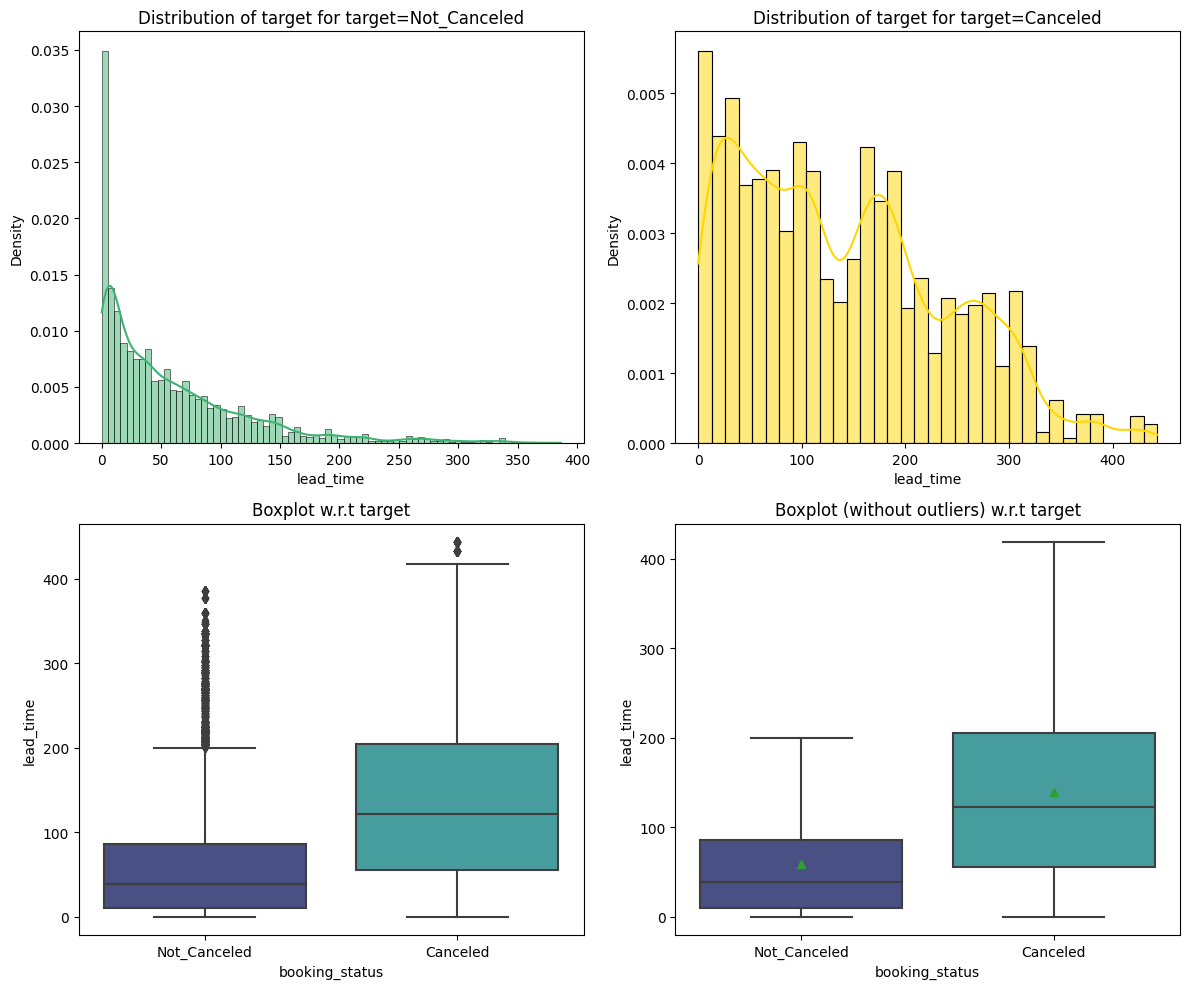

In [59]:
distribution_plot_wrt_target(data, "lead_time", "booking_status",xlabel1="Lead Time",xlabel2="Booking Status")

**Observations:**

Bookings that were canceled and bookings that were not canceled exhibit a significant disparity in their median lead time. 

Generally, bookings with longer lead times are more likely to be canceled

**Booking Status vs. Market Segment Type, Special Requests,Room Type Reserved and Meal Plan**

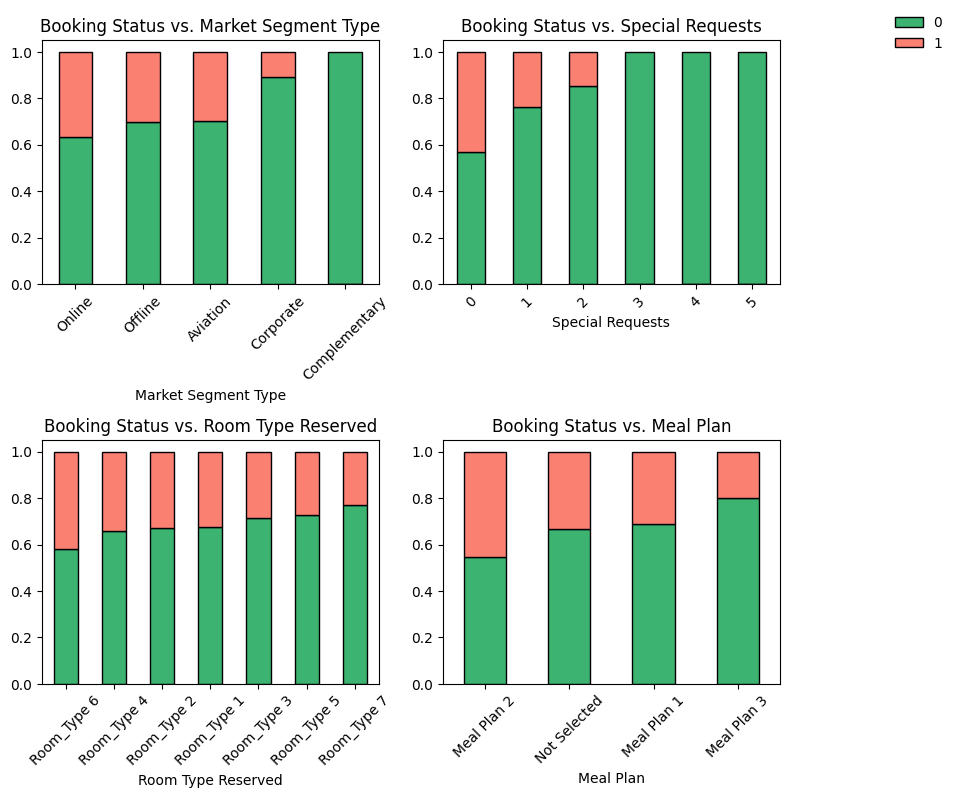

In [60]:
# Create a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Call the function for each subplot and set title
ax1 = stacked_barplot(df, "market_segment_type", "booking_status", Xlabel='Market Segment Type', ax=axes[0, 0])
ax1.set_title('Booking Status vs. Market Segment Type')

ax2 = stacked_barplot(df, "no_of_special_requests", "booking_status", Xlabel='Special Requests', ax=axes[0, 1])
ax2.set_title('Booking Status vs. Special Requests')

ax3 = stacked_barplot(df, "room_type_reserved", "booking_status", Xlabel='Room Type Reserved', ax=axes[1, 0])
ax3.set_title('Booking Status vs. Room Type Reserved')

ax4 = stacked_barplot(df, "type_of_meal_plan", "booking_status", Xlabel='Meal Plan', ax=axes[1, 1])
ax4.set_title('Booking Status vs. Meal Plan')

# Add a common legend outside of the subplots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2,1.0), frameon=False)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [61]:
# market_segment_booking_status_1 = df.groupby(['market_segment_type'])['booking_status'].value_counts(normalize=True)[df.groupby(['market_segment_type'])['booking_status'].value_counts(normalize=True).index.get_level_values('booking_status') == 1]*100
# market_segment_booking_status_1

**Observations:**

**Market Segment:** Approximately 40% of the bookings in the Online market segment are cancelled, while the Corporate segment shows low cancellation rates.

**No. of Special Requests:** Bookings with 3 or more special requests show 0 cancellations.

**Room Type and Meal Plan:** All Room Type and Meal Plan have almost similar cancellation rates and do not significantly contribute to determining the cancellation pattern.

**Feature Engineering**

**Booking Status vs Family Data**

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [62]:
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [63]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

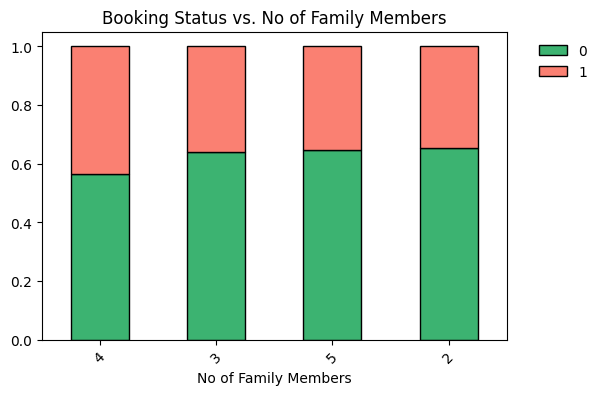

In [64]:
plt.figure(figsize=(6,4))
ax=stacked_barplot(family_data, "no_of_family_members", "booking_status",Xlabel='No of Family Members')
ax.set_title('Booking Status vs. No of Family Members')
ax.legend(loc='upper right',bbox_to_anchor=(1.2,1.0), frameon=False)
plt.show()

**Observations:**
Bookings that include 4 family members have a cancellation rate of approximately 40%.

**Booking Status vs days of stay**

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [65]:
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
stay_data.shape


(17094, 18)

In [66]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

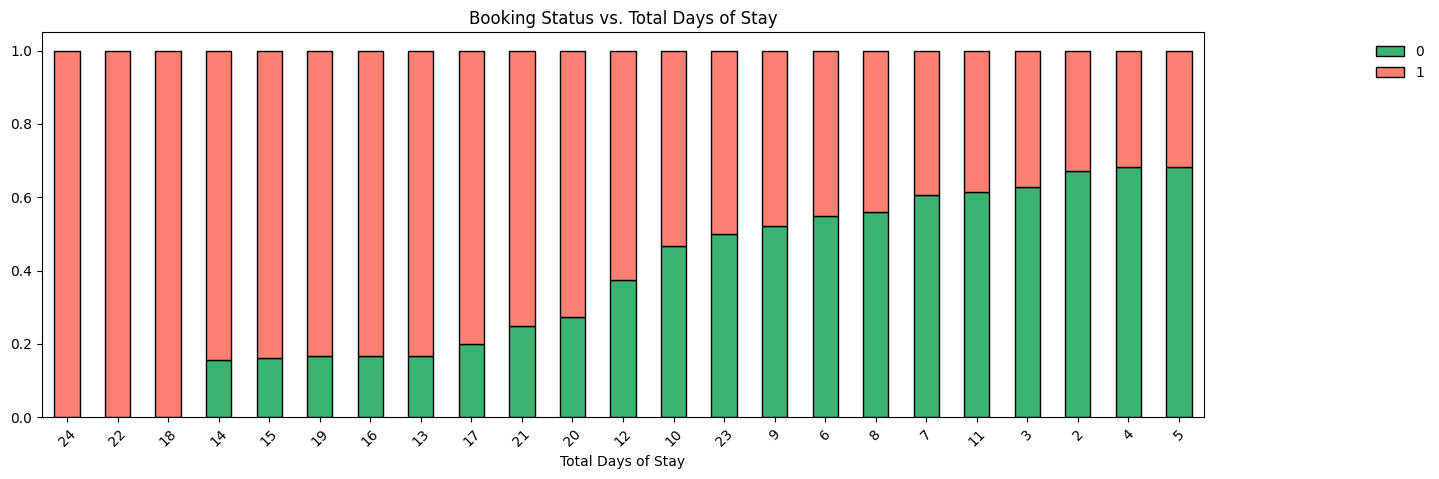

In [67]:
plt.figure(figsize=(15,5))
ax=stacked_barplot(stay_data, "total_days", "booking_status",Xlabel='Total Days of Stay')
ax.set_title('Booking Status vs. Total Days of Stay')
ax.legend(loc='upper right',bbox_to_anchor=(1.2,1.0), frameon=False)
plt.show()

**Observations:**
Cancellation rates tend to increase with the number of total days of stay.

**Observations  with Target Variable - Booking Status**
1.   The prices for the canceled bookings are slightly higher than the bookings which were not canceled.
2.   Bookings with longer lead times are more likely to be canceled.
3.   Booking from Online marget segment has highest cancellation rate.
4.   Bookings with 3 or more special requests show 0 cancellations.
5.  Bookings that include 4 family members have a cancellation rate of approximately 40%.
6.   Cancellation rates tend to increase with the number of total days of stay.








**Answers to Leading Questions**

**1. What are the busiest months in the hotel?**

**Let's find out what are the busiest months in the hotel.**

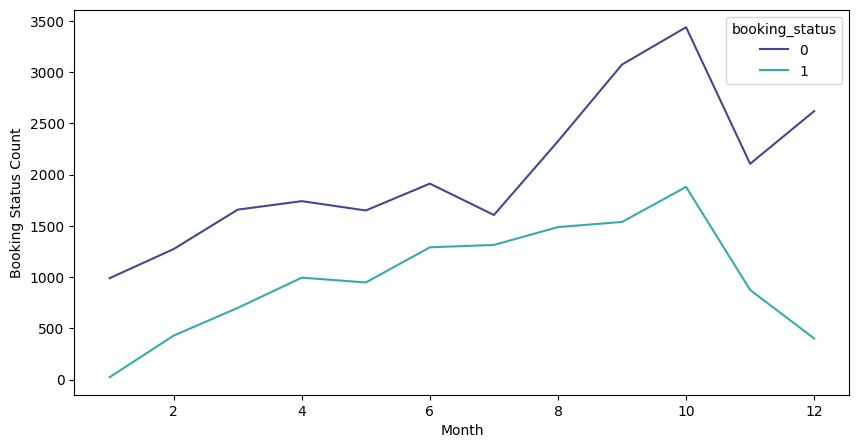

In [68]:
monthly_data = df.groupby(["arrival_month", "booking_status"])["booking_status"].count().reset_index(name='Booking Status Count').rename(columns={'arrival_month': 'Month','booking_status':'Booking Status'})
# plotting the trend over different months
plt.figure(figsize=(10, 5))
# Converting booking_status column to categorical data type
monthly_data['booking_status'] = monthly_data['Booking Status'].astype('category')
sns.lineplot(data=monthly_data, x="Month", y="Booking Status Count",hue='booking_status',palette='mako')
plt.show()



**Observations:**
The month of October has the highest booking activity, followed by September and August.

**2. Which market segment do most of the guests come from?**

In [69]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

**Observations:**
The majority of guests are from the Online market segment, followed by the Offline market segment.

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

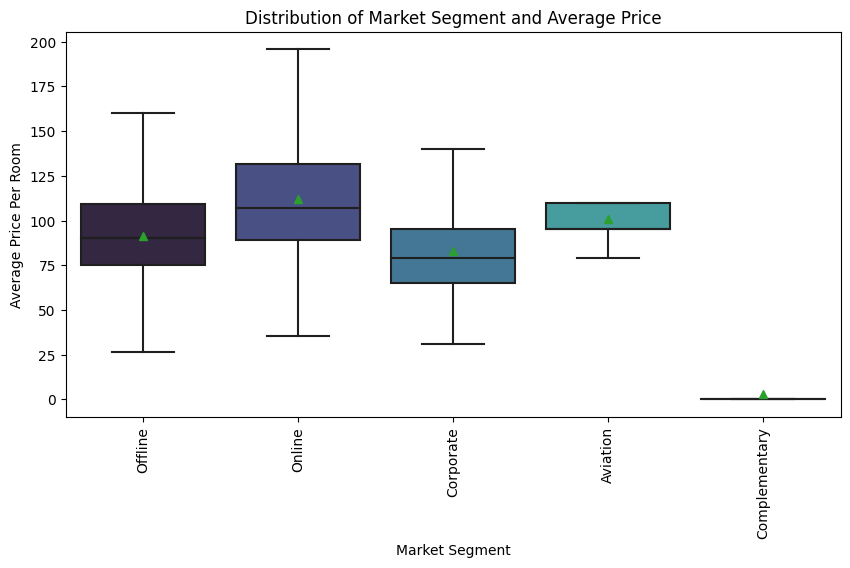

In [70]:
plt.figure(figsize=(10, 5))
bplot=sns.boxplot(    data=data, x="market_segment_type", y="avg_price_per_room", palette="mako",showmeans=True,showfliers=False)
bplot.set_title('Distribution of Market Segment and Average Price')
plt.xlabel('Market Segment')
plt.ylabel('Average Price Per Room')
plt.xticks(rotation=90)
plt.show()

**Observations:**

The box plot for the Online market segment is larger, indicating a higher variation in the average price per room compared to other market segments. This suggests that there may be a wider range of prices within the Online market segment, with some bookings having higher prices and others having lower prices.

The Offline and Corporate market segments have similar box plot characteristics, showing similar variability in the average price per room. This could imply that these two segments have similar pricing patterns or strategies, with comparable ranges of prices.

The Aviation market segment has a considerably smaller price range compared to Online, Offline, and Corporate. This suggests that the prices in the Aviation segment may be relatively consistent or less variable compared to other segments.

The Complementary market segment shows an average price per room of 0 EUR, which may indicate free or complimentary bookings in this segment. This could be a special type of booking where the room charge is waived or included as part of a complementary package or service.



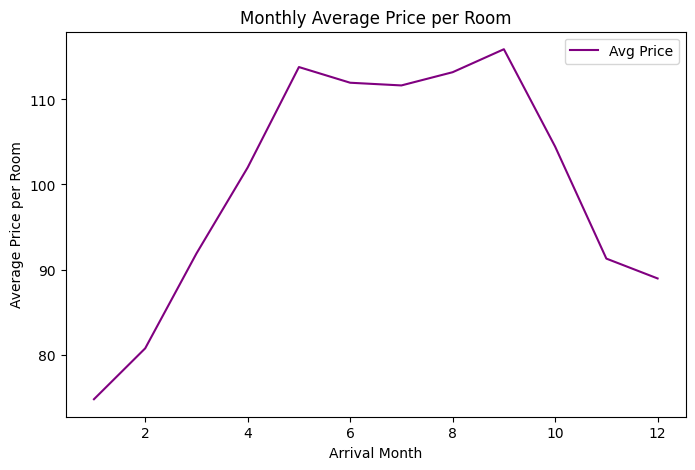

In [71]:
# Set the figure size
plt.figure(figsize=(8, 5))
# Create the line plot
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"],ci=None,color='purple')

# Add labels and title
plt.xlabel("Arrival Month")
plt.ylabel("Average Price per Room")
plt.title("Monthly Average Price per Room")

 # Add a custom legend
plt.plot([],label="Avg Price",color='purple') 
plt.legend()

# Show the plot
plt.show()

In [72]:
df.groupby(['arrival_month'])['avg_price_per_room'].mean()

arrival_month
1     74.74976
2     80.73364
3     91.73084
4    101.99880
5    113.81068
6    111.96650
7    111.64932
8    113.20398
9    115.90692
10   104.46087
11    91.28543
12    88.95218
Name: avg_price_per_room, dtype: float64

In [73]:
df[(df['arrival_month'] >= 5) & (df['arrival_month'] <= 9)]['avg_price_per_room'].mean()

113.52688422280549

**Observations:**

The price of rooms is highest during the months of May to September, with an average price of around 113 EUR per room. 

This is also the time frame when the bookings are most, as indicated by the observation that the bookings are busiest in October, September, and August.

**4. What percentage of bookings are canceled?**

**Let's check the percentage of bookings canceled in each month.**

In [74]:
#Returns the percentage of cancellation each month
df_cancellation_month=df.groupby(['booking_status'])['arrival_month'].get_group(1).value_counts(normalize=True)*100
# Create a dictionary to map month numbers to month names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Convert month numbers to month names using the apply function
df_cancellation_month.index = df_cancellation_month.index.map(month_dict)
# Display the result
print(df_cancellation_month)


October     15.81826
September   12.94068
August      12.51998
July        11.05595
June        10.86243
April        8.37190
May          7.97644
November     7.36222
March        5.88978
February     3.61801
December     3.38241
January      0.20194
Name: arrival_month, dtype: float64


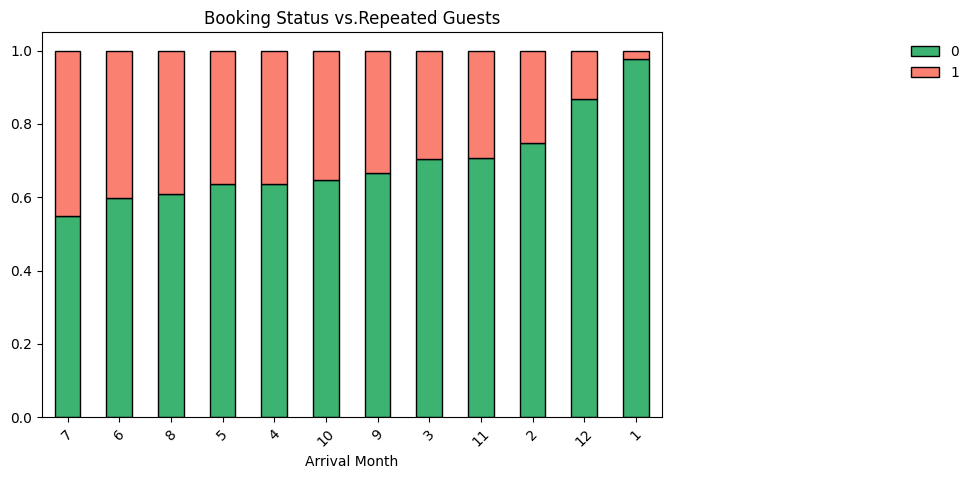

In [75]:
plt.figure(figsize=(8,5))
ax=stacked_barplot(df, "arrival_month", "booking_status",Xlabel='Arrival Month')
ax.set_title('Booking Status vs.Repeated Guests')
ax.legend(loc='upper right',bbox_to_anchor=(1.5,1.0), frameon=False)
plt.show()

**Observations:**

There is a higher number of cancellations in October, followed by September and August, which coincides with the busiest months when more bookings are made and the average price per room is high compared to other months. 

This may suggest a potential relationship between higher booking activity, higher prices, and cancellations during the peak season months. Further analysis and investigation may be needed to understand the underlying reasons for this pattern.

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [76]:
#Returns the percentage of cancellation each month
df_cancellation_repeated_guest=df.groupby(['booking_status'])['repeated_guest'].get_group(1).value_counts(normalize=True)*100
df_cancellation_repeated_guest

0   99.86538
1    0.13462
Name: repeated_guest, dtype: float64

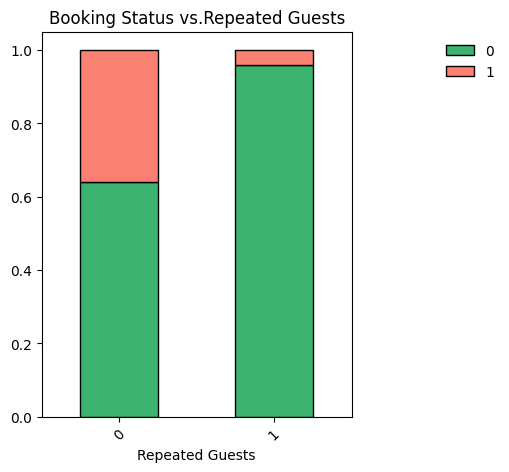

In [77]:
plt.figure(figsize=(4,5))
ax=stacked_barplot(stay_data, "repeated_guest", "booking_status",Xlabel='Repeated Guests')
ax.set_title('Booking Status vs.Repeated Guests')
ax.legend(loc='upper right',bbox_to_anchor=(1.5,1.0), frameon=False)
plt.show()

**Observations:**

Only a very few repeated guests cancel their bookings. 

This may indicate that repeat guests are more likely to honor their bookings and have a lower cancellation rate compared to first-time guests. 

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

In [78]:
#Returns the percentage of cancellation each month
df_cancellation_spl_request=df.groupby(['booking_status'])['no_of_special_requests'].get_group(1).value_counts(normalize=True)*100
df_cancellation_spl_request

0   71.89735
1   22.74295
2    5.35970
Name: no_of_special_requests, dtype: float64

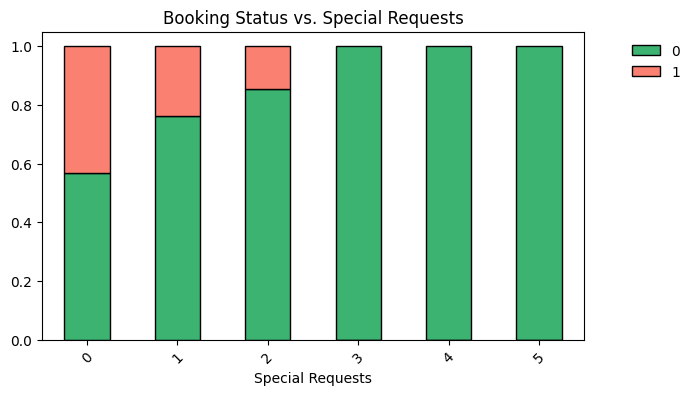

In [79]:
plt.figure(figsize=(7,4))
ax=stacked_barplot(df, "no_of_special_requests", "booking_status", Xlabel='Special Requests')
ax.set_title('Booking Status vs. Special Requests')
ax.legend(loc='upper right',bbox_to_anchor=(1.2,1.0), frameon=False)
plt.show()

**Observations:**
Customers making more than 2 special requests are less likely to cancel the bookings.

**Outlier Detection**

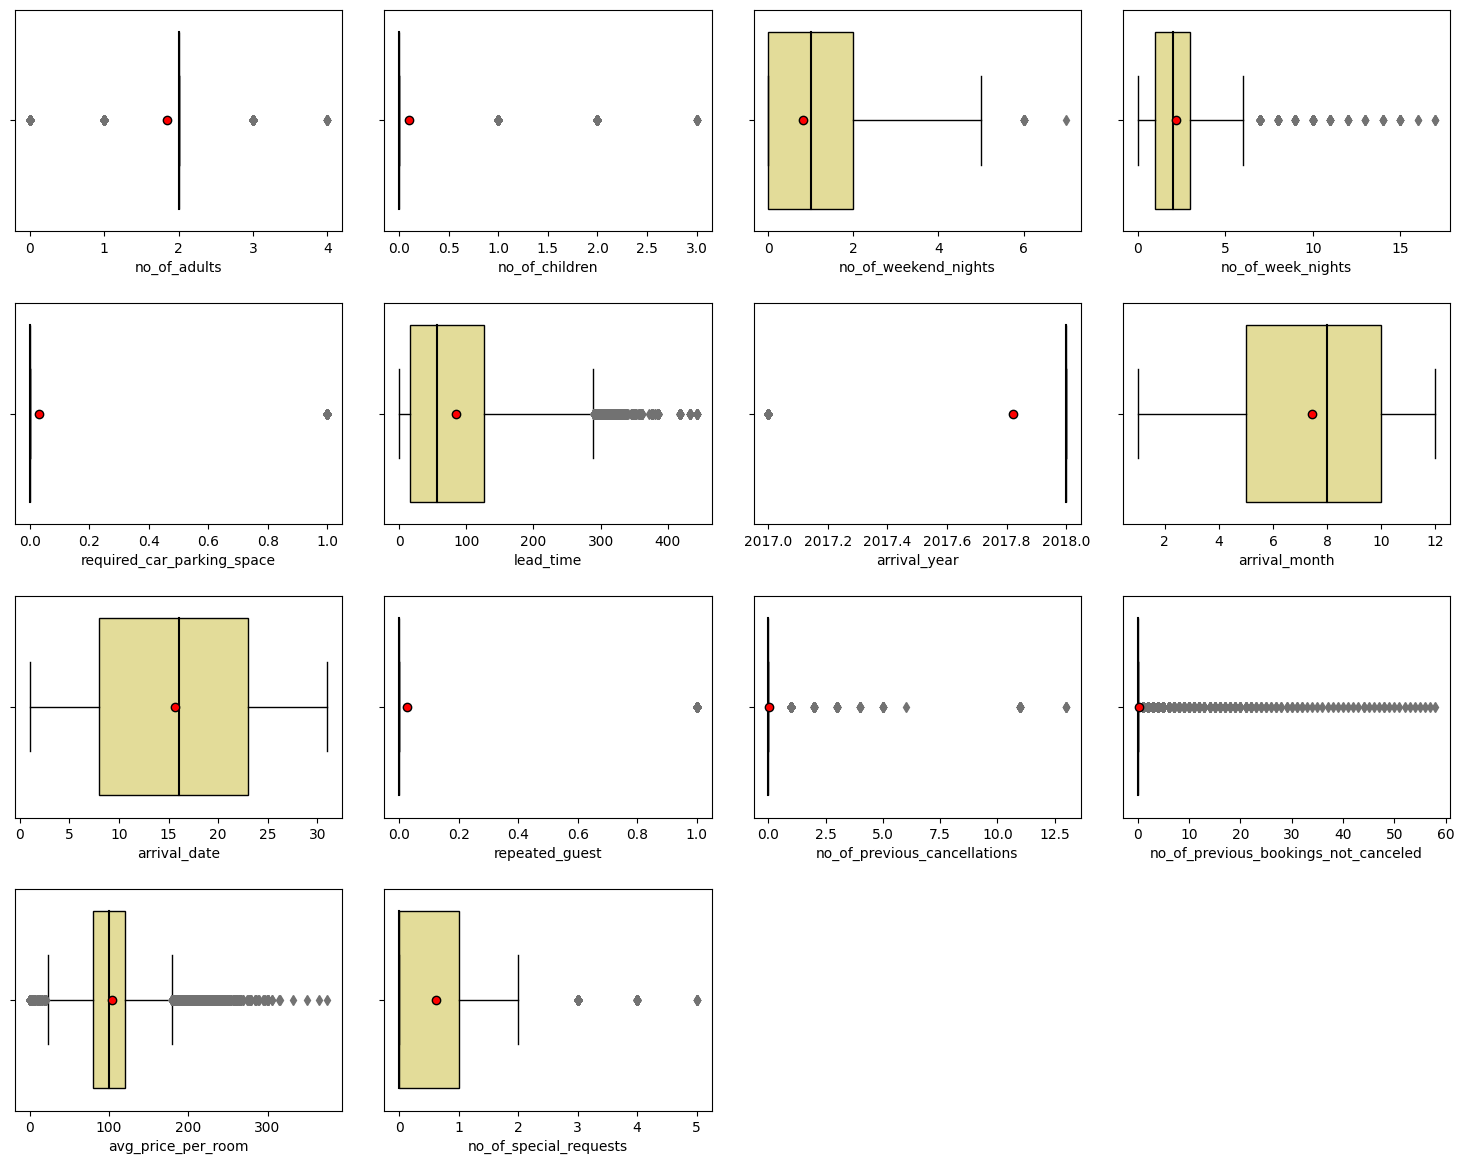

In [80]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True, color="khaki",meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},boxprops=dict(linewidth=1, edgecolor='black'),medianprops={"color": "black"},whiskerprops={'color': 'black', 'linewidth': 1},capprops={'color': 'black', 'linewidth': 1})
    plt.tight_layout(pad=2)  

plt.show()

**Observations:**

There are quite a few outliers in the data, but they are not treated as they are considered as proper values

## **Model Building - Logistic Regression**

**Data Preparation for modeling (Logistic Regression)**

In [81]:
#Splitting Train and Test Dataset
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding constant
X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [82]:
#Shape of Test and Train Data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Fitting the Logistic Regression Model**

In [83]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3292
Time:                        17:19:26   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

**Model Performance Evaluation**

The model can make wrong predictions in two cases:

1. Predicting that a customer will not cancel their booking, but in reality, the customer cancels their booking (False Negative).

2. Predicting that a customer will cancel their booking, but in reality, the customer does not cancel their booking (False Positive).
Both cases are important as they can have negative impacts on the hotel's operations and customer satisfaction.

If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs.

If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide required services to the customer and may lead to loss of customers over time.

To reduce this loss, it is crucial to minimize both False Negatives and False Positives. One approach is to optimize the F1-score, which is a metric that balances both Precision and Recall. The F1-score is computed as:

  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$



**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [85]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='mako')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

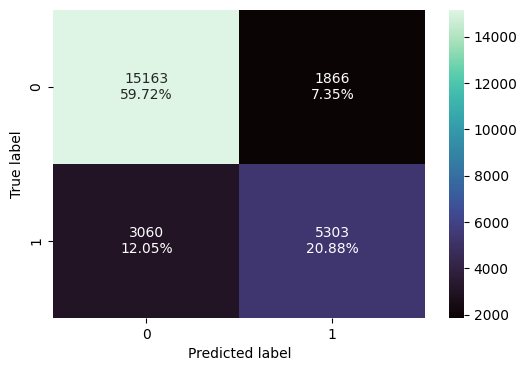

In [86]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [87]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80600 0.63410    0.73971 0.68285

**Observations:**

The F1 Score is **~0.68** and we will try to maximize further.

The variables used to build the model might contain multicollinearity, which will affect the p-values

We will have to remove multicollinearity from the data to get reliable coefficients and p-values

**Checking Multicollinearity**

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb:

If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of βk is not inflated at all
If VIF exceeds 5, we say there is moderate multicollinearity
If VIF is equal or exceeding 10, it shows signs of high multi-collinearity
The purpose of the analysis should dictate which threshold to use

In [88]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [89]:
checking_vif(X_train)

feature            VIF
0                                  const 39497686.20788
1                           no_of_adults        1.35113
2                         no_of_children        2.09358
3                   no_of_weekend_nights        1.06948
4                      no_of_week_nights        1.09571
5             required_car_parking_space        1.03997
6                              lead_time        1.39517
7                           arrival_year        1.43190
8                          arrival_month        1.27633
9                           arrival_date        1.00679
10                        repeated_guest        1.78358
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06860
14                no_of_special_requests        1.24798
15         type_of_meal_plan_Meal Plan 2        1.27328
16         type_of_meal_plan_Meal Plan 3        1.02526
17        type_of_meal_plan_Not Selected        1.27306
18        room_type_reserved_Room_Type 2        1.10595
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36361
21        room_type_reserved_Room_Type 5        1.02800
22        room_type_reserved_Room_Type 6        2.05614
23        room_type_reserved_Room_Type 7        1.11816
24     market_segment_type_Complementary        4.50276
25         market_segment_type_Corporate       16.92829
26           market_segment_type_Offline       64.11564
27            market_segment_type_Online       71.18026

**Observations:**

It appears that none of the numerical variables in the dataset show moderate or high multicollinearity. 

VIF is ignored for dummy variables.

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [90]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [91]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [92]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3282
Time:                        17:19:31   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [93]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

**Observations:**

Now no categorical feature has p-value greater than 0.05, so we'll consider the features in X_train1 as the final ones and lg1 as final model.

**Coefficient Interpretations**

Variables with a positive coefficient, such as **no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, no_of_previous_cancellations ,lead_time, avg_price_per_room, type_of_meal_plan_Not Selected, and others**, suggest that an increase in these variables is associated with an increase in the likelihood of a customer canceling their booking. This implies that higher values of these variables may indicate factors that may increase the chances of cancellation.

Variables with a negative coefficient, such as **required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests,**and others, indicate that an increase in these variables is associated with a decrease in the likelihood of a customer canceling their booking. In other words, higher values of these variables may indicate factors that are likely to reduce the chances of cancellation.



**Converting coefficients to odds**

The coefficients (βs) of the logistic regression model are in terms of log(odds) and to find the odds, we have to take the exponential of the coefficients
Therefore, odds=exp(β)
The percentage change in odds is given as (exp(β)−1)∗100

In [94]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11491         1.16546               1.11470   
Change_odd% -100.00000      11.49096        16.54593              11.46966   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04258                     0.20296    1.01583   
Change_odd%            4.25841                   -79.70395    1.58331   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57195        0.95839         0.06478   
Change_odd%      57.19508       -4.16120       -93.52180   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25712             1.01937   
Change_odd%                      25.71181             1.93684   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22996                        1.17846   
Change_odd%               -77.00374                       17.84641   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33109                         0.70104   
Change_odd%                        33.10947                       -29.89588   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75364                         0.47885   
Change_odd%                       -24.63551                       -52.11548   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37977                         0.23827   
Change_odd%                       -62.02290                       -76.17294   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45326                      0.16773  
Change_odd%                      -54.67373                    -83.22724

**Observations:**

**no_of_adults:** Holding all other features constant, a 1 unit change in the number of adults will increase the odds of booking getting cancelled by 1.11 times or a 11.49% increase in odds of booking getting cancelled.

**no_of_children:** Holding all other features constant, a 1 unit change in the number of children will increase the odds of booking getting cancelled by 1.16 times or a 16.55% increase in odds of booking getting cancelled.

**no_of_weekend_nights**:Holding all other features constant, a 1 unit change in the number of weekend nights will increase the odds of booking getting cancelled by 1.11 times or a 11.47% increase in odds of booking getting cancelled.

**no_of_week_nights:** Holding all other features constant, a 1 unit change in the number of week nights will increase the odds of booking getting cancelled by 1.04 times or a 4.26% increase in odds of booking getting cancelled.

**required_car_parking_space:** Holding all other features constant, a 1 unit change in the required parking space will decrease the odds of booking getting cancelled by 0.20 times or a 79.70% decrease in odds of booking getting cancelled.

**lead_time:** Holding all other features constant, a 1 unit change in the lead time will increase the odds of booking getting cancelled by 1.02 times or a 1.58% increase in odds of booking getting cancelled.

**repeated guest:** Holding all other features constant, a 1 unit change in the number of repeated guests will decrease the odds of booking getting cancelled by 0.06 times or a 93.52% decrease in odds of booking getting cancelled.

**no_of_previous_cancellations:** Holding all other features constant, a 1 unit change in the no of previous cancellations will increase the odds of booking getting cancelled by 1.26 times or a 25.71% increase in odds of booking getting cancelled.

**avg_price_per_room:** Holding all other features constant, a 1 unit change in the average price per room will increase the odds of booking getting cancelled by 1.02 times or a 1.94% increase in odds of booking getting cancelled.

**no_of_special_requests:** Holding all other features constant a 1 unit change in the number of special requests made by the customer will decrease the odds of a booking getting cancelled by 0.22 times or a 77% decrease in the odds of a booking getting cancelled.

**type_of_meal_plan_Not Selected:** The odds of a customer who has not selected any meal plan cancelling the booking are 1.33 times more than a customer who has selected a meal plan or a 33.10% higher odds of a booking getting cancelled if a meal plan is not selected.

**market_segment_type_Corporate**:The odds of a customer from Corporate market segment canceling the booking is ~0.453 less than the customer from baseline market segment types or ~ 54.67% fewer odds of customers from baseline market segment types. 
**market_segment_type_Offline**
Similarly the odds of a customer from Offline market segment cancelling the booking is ~ 0.167 less than the  customer from baseline market segment types or ~ 83.2% less odds of customers from baseline market segment types. 

Similarly we can interpret every other coefficients.




**Checking performance of the new model - Train**

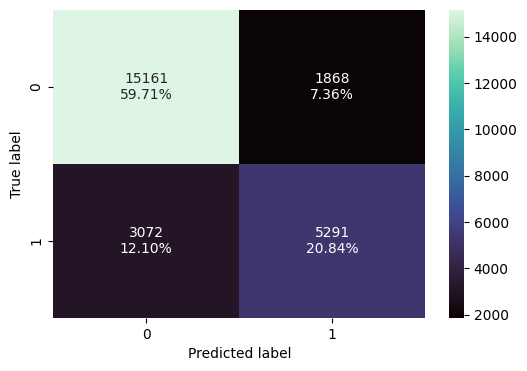

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [96]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174

**Checking performance of the new model - Test**

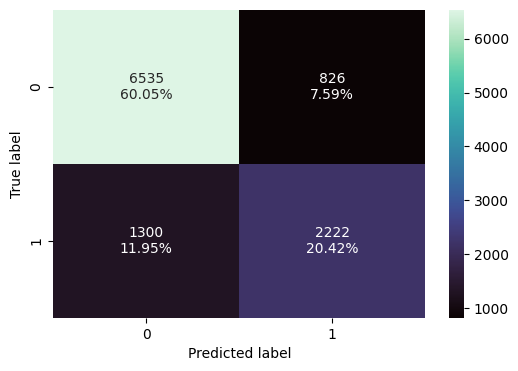

In [97]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [98]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

The model is giving a good f1_score of ~0.681 and ~0.677 on the train and test sets respectively
As the train and test performances are comparable, the model is not overfitting, we will try to improve the performance of the model

## Model Performance Improvement

### ROC Curve and ROC-AUC

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

* ROC-AUC on training set

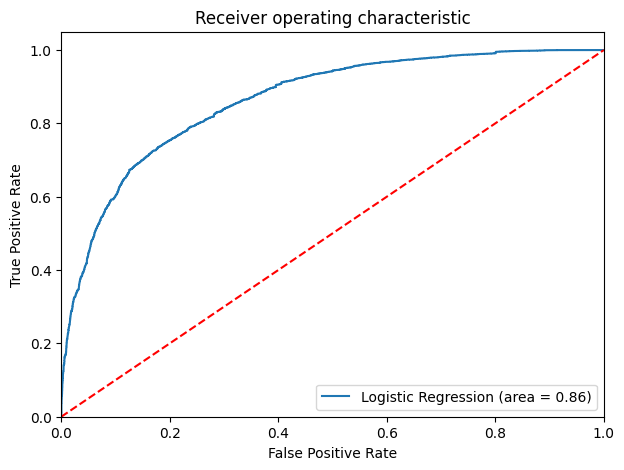

In [99]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.
* ROC Score 0.86

**Optimal threshold using AUC-ROC curve**

In [100]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558708252


**Checking model performance on training set**

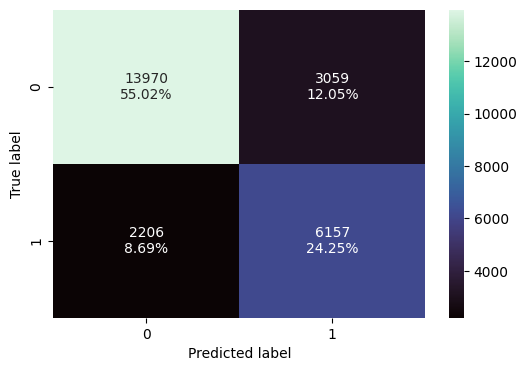

In [101]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [102]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79265 0.73622    0.66808 0.70049

Recall has shown a significant improvement compared to the previous model, which indicates that more true positive samples are being correctly identified.

However, other metrics have reduced. So it's important  to strike an optimal balance between recall and precision.

**Checking model performance on test set**

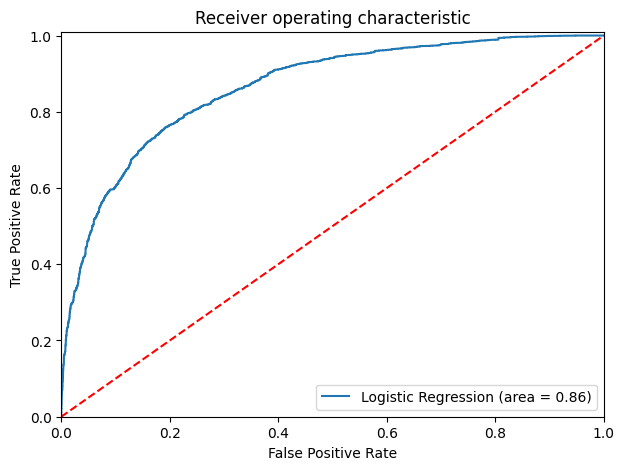

In [103]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

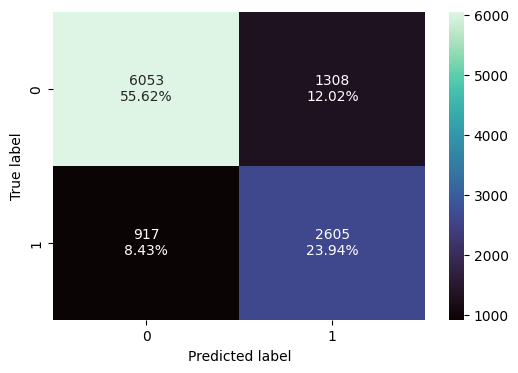

In [104]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [105]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

### Precision-Recall Curve

Threshold value:  0.4208437617200989


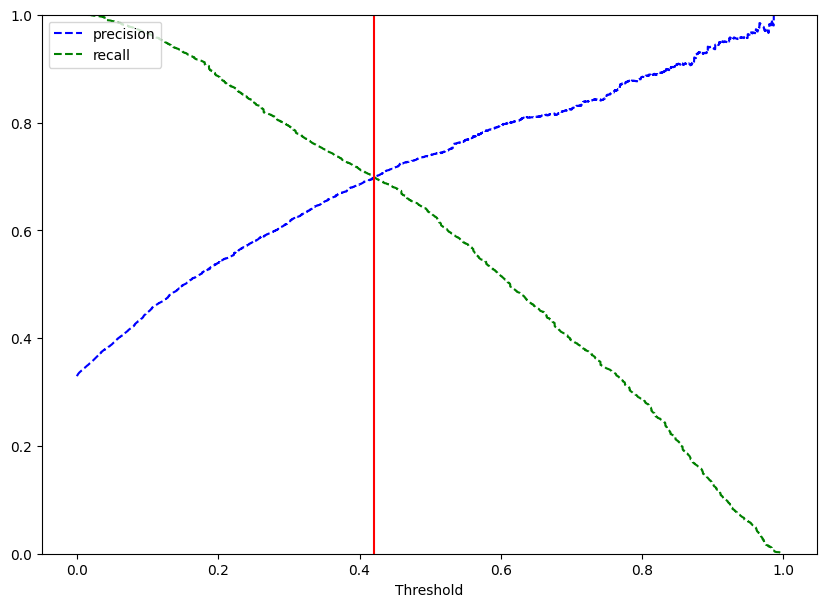

In [106]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

# Find the index of the threshold where precision and recall intersect
intersection_index = np.argmin(np.abs(prec - rec))
# Get the corresponding threshold value
intersection_threshold = tre[intersection_index]
print("Threshold value: ",intersection_threshold)

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
# Draw a vertical line at the point of intersection
plt.axvline(x=intersection_threshold, color='r', linestyle='-', label='Intersection')
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [107]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

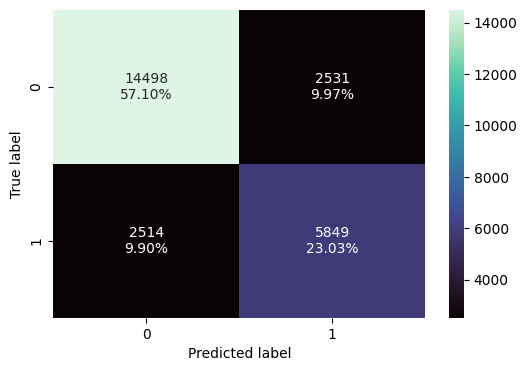

In [108]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [109]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69939    0.69797 0.69868

**Checking model performance on test set**

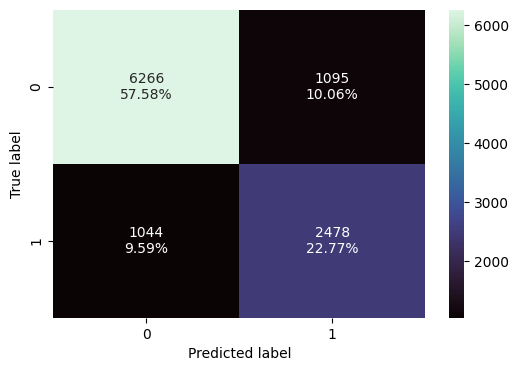

In [110]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [111]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80345 0.70358    0.69353 0.69852

**Model Performance Comparison and Final Model Selection**

**Training Set**

In [112]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold(0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold(0.5)  \
Accuracy                                      0.80545   
Recall                                        0.63267   
Precision                                     0.73907   
F1                                            0.68174   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79265   
Recall                                0.73622   
Precision                             0.66808   
F1                                    0.70049   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69939  
Precision                             0.69797  
F1                                    0.69868

**Testing Set**

In [113]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80465   
Recall                                   0.63089   
Precision                                0.72900   
F1                                       0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80345  
Recall                                0.70358  
Precision                             0.69353  
F1                                    0.69852

**Observations for Test Data:**

Default Threshold Model: Good precision, low recall. Predicts which bookings will not be cancelled, maintains customer satisfaction but may lose resources.

0.37 Threshold Model: High recall, low precision. Saves resources by predicting likely cancellations but may affect customer satisfaction.

0.42 Threshold Model: Balanced recall and precision. Maintains a balance between resources and customer satisfaction.

## **Model Building - Decision Trees**

In [114]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [115]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


### Decision Tree (default)

In [116]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [117]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap='mako')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [118]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

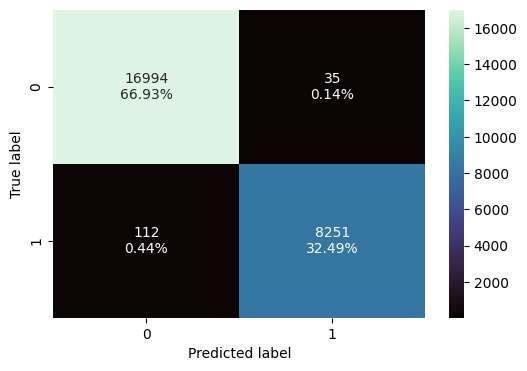

In [119]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [120]:
decision_tree_perf_train_default= model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_default

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

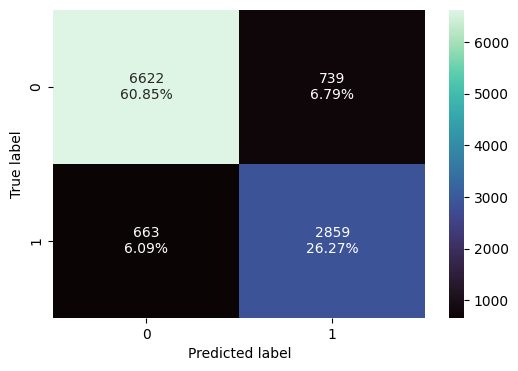

In [121]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [122]:
decision_tree_perf_test_default = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_default

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

**Observations:**

The decision tree model is overfitting to the training dataset, resulting in good performance on the training dataset but limited generalization to the test dataset.

**Important Features**

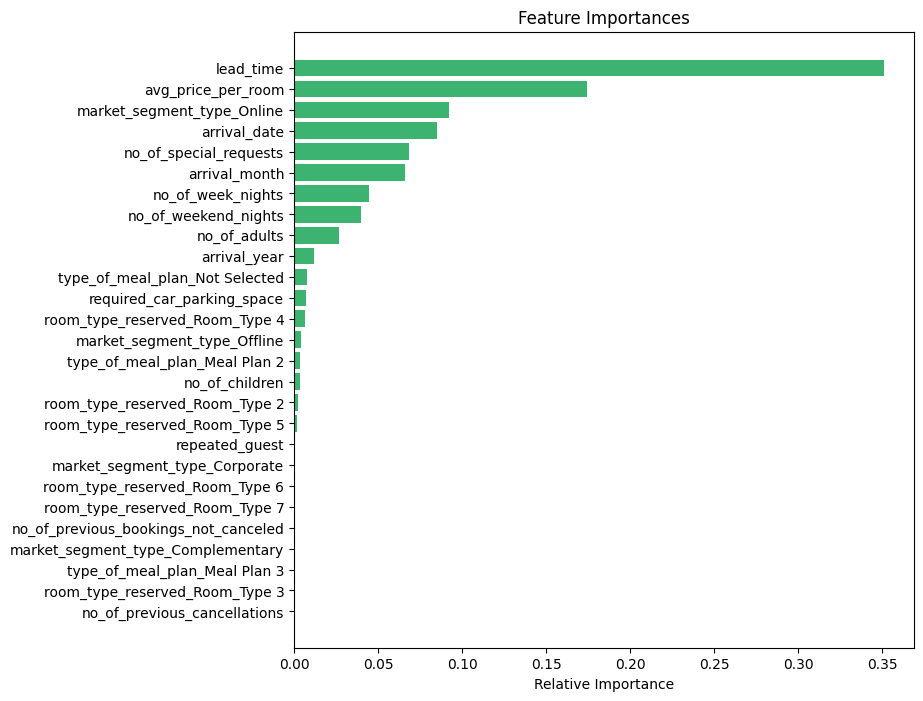

In [123]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="mediumseagreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

Lead Time followed by Average price are the important features.

### Decision Tree (with class_weights)

In [124]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

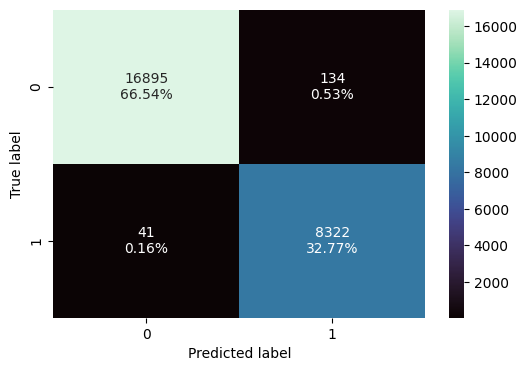

In [125]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [126]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

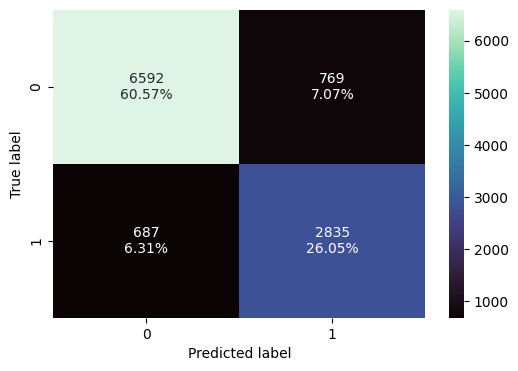

In [127]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [128]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86621 0.80494    0.78663 0.79568

**Observations:**

The decision tree model is overfitting to the training dataset, resulting in good performance on the training dataset but limited generalization to the test dataset.

**Important Features**

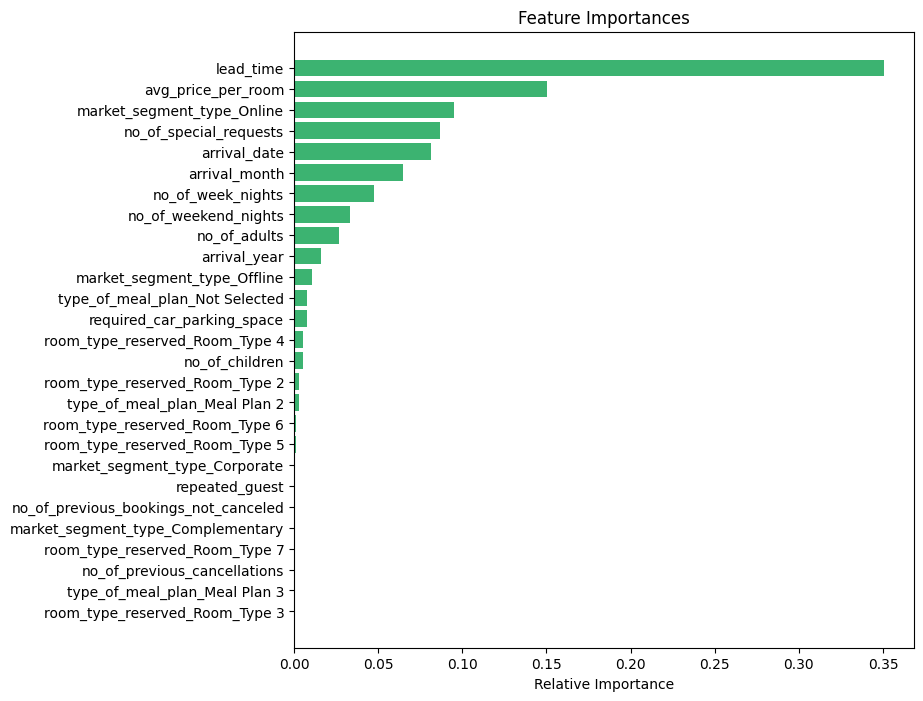

In [129]:
feature_names = list(X_train.columns)
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="mediumseagreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**

Lead Time followed by Average price are the important features.

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [130]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1,class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

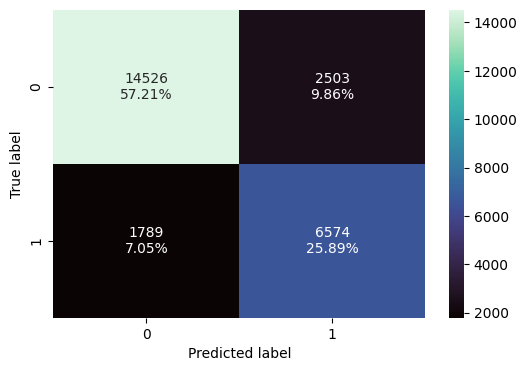

In [131]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [132]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

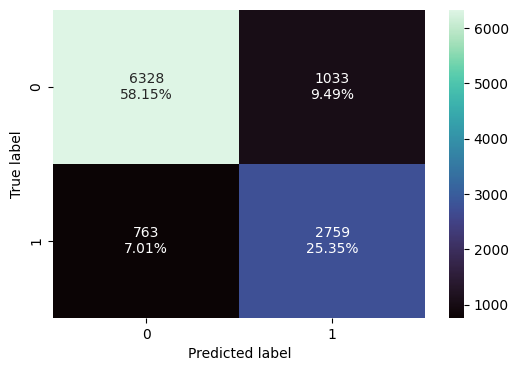

In [133]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [134]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

* The model is giving a generalized result on both the train and test data which shows that the model is able to generalize well on unseen data.

**Important Features**

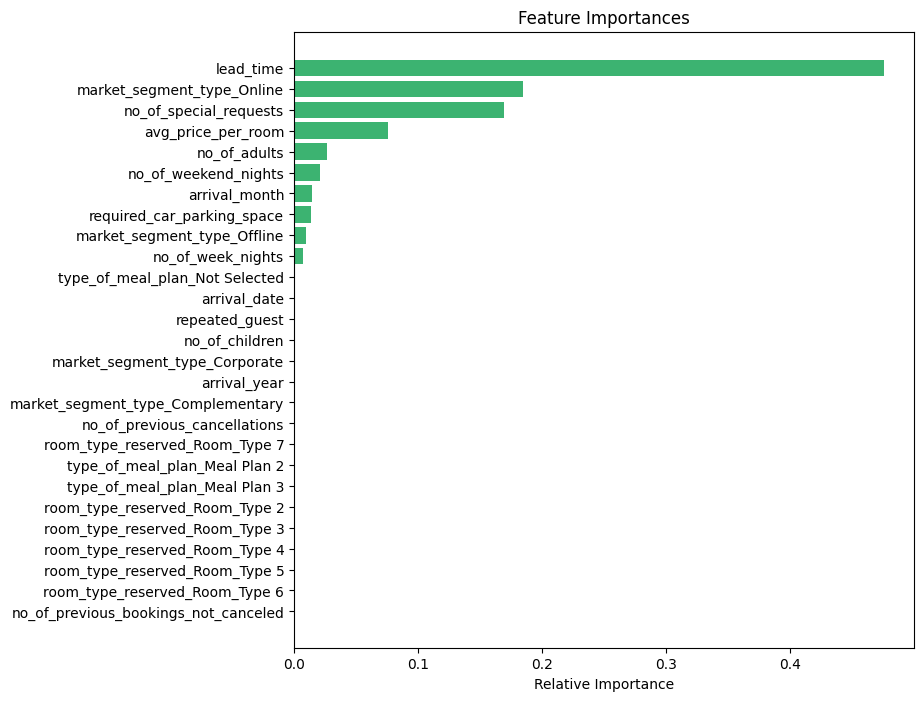

In [135]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="mediumseagreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Visualizing the Decision Tree**

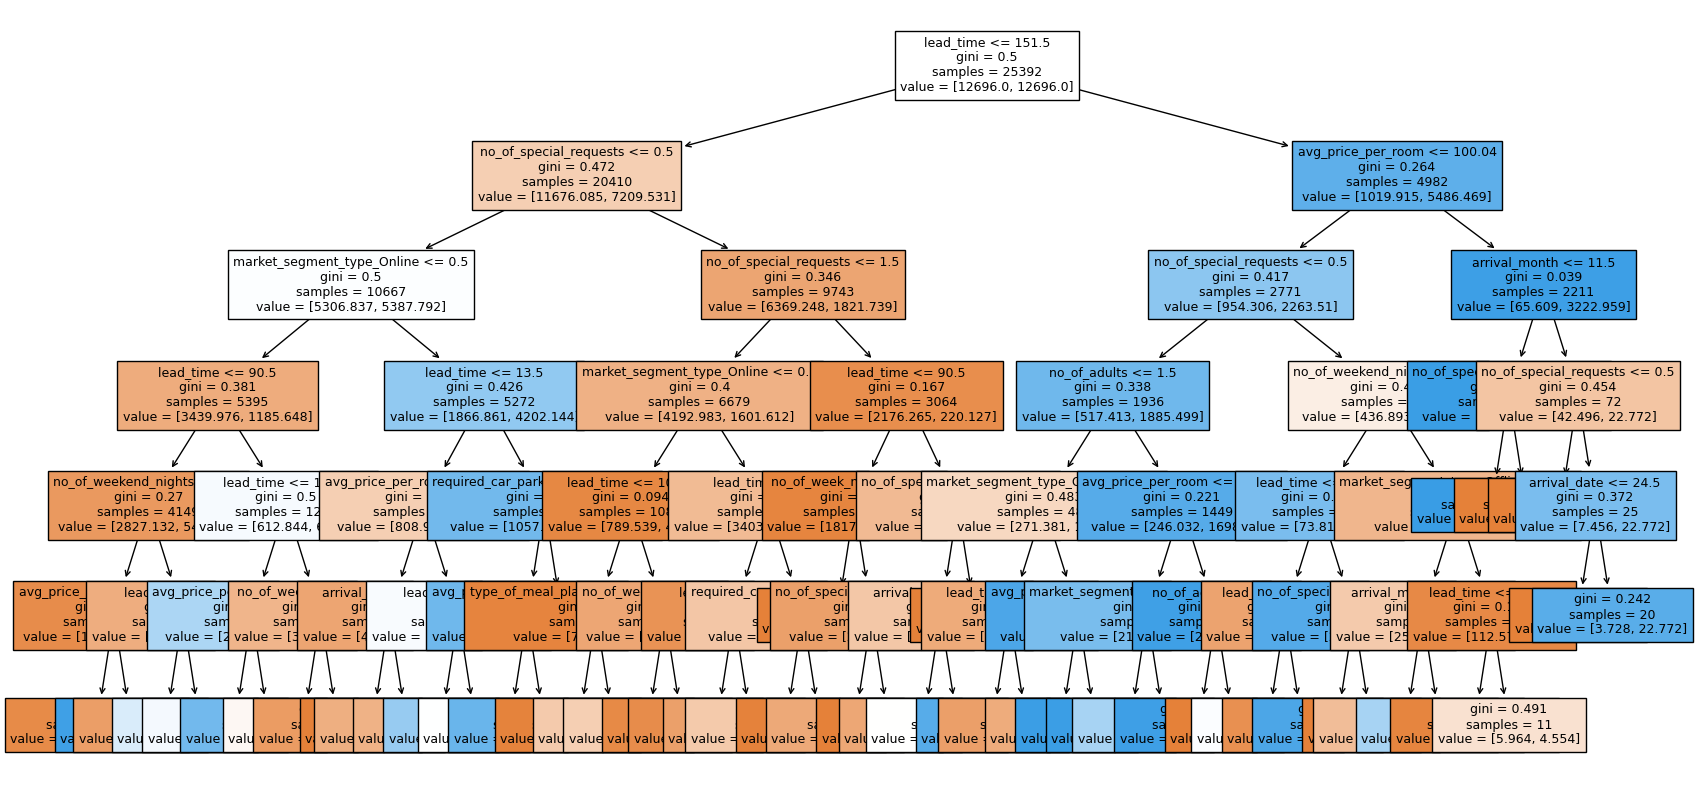

In [136]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

**Observations from the pre-pruned tree:**





**Important Features:**
* lead time
* market segment type (online)
* no of special requests
* Average price per room

**Interpretations:**

Leaf Node 1: Predicted Class: 0 (Booking will not be cancelled)
Conditions: If lead_time is less than or equal to 151.50, no_of_special_requests is less than or equal to 0.50, market_segment_type_Online is less than or equal to 0.50, lead_time is less than or equal to 90.50, no_of_weekend_nights is less than or equal to 0.50, and avg_price_per_room is less than or equal to 196.50, then the model predicts that the booking will not be cancelled.

Leaf Node 2: Predicted Class: 1 (Booking will be cancelled)
Conditions: If lead_time is less than or equal to 151.50, no_of_special_requests is less than or equal to 0.50, market_segment_type_Online is less than or equal to 0.50, lead_time is less than or equal to 90.50, no_of_weekend_nights is less than or equal to 0.50, and avg_price_per_room is greater than 196.50, then the model predicts that the booking will be cancelled.

Leaf Node 3: Predicted Class: 1 (Booking will be cancelled)
Conditions: If lead_time is less than or equal to 151.50, no_of_special_requests is less than or equal to 0.50, market_segment_type_Online is less than or equal to 0.50, lead_time is greater than 90.50, lead_time is less than or equal to 117.50, and avg_price_per_room is less than or equal to 93.58, then the model predicts that the booking will be cancelled.

Leaf Node 4: Predicted Class: 1 (Booking will be cancelled)
Conditions: If lead_time is less than or equal to 151.50, no_of_special_requests is less than or equal to 0.50, market_segment_type_Online is less than or equal to 0.50, lead_time is greater than 90.50, lead_time is less than or equal to 117.50, and avg_price_per_room is greater than 93.58, then the model predicts that the booking will be cancelled.


Similarly we can interpret all the nodes.

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

**Cost Complexity Pruning**

In [138]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [139]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1839     0.00890     0.32806
1840     0.00980     0.33786
1841     0.01272     0.35058
1842     0.03412     0.41882
1843     0.08118     0.50000

[1844 rows x 2 columns]

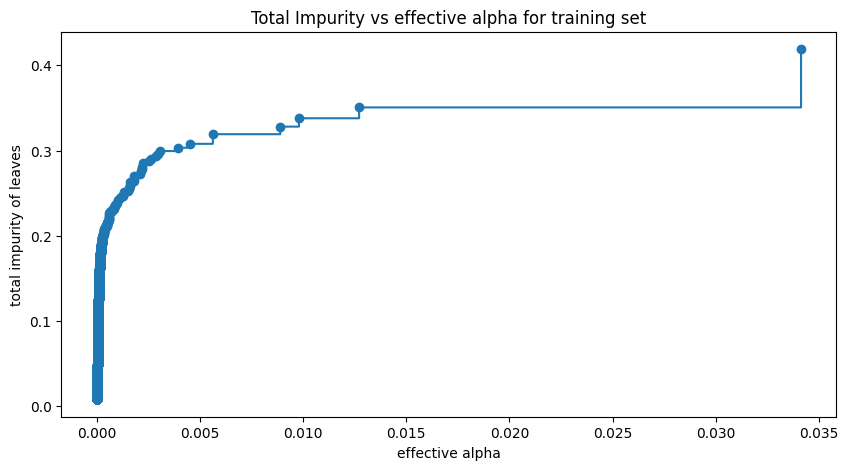

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [141]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

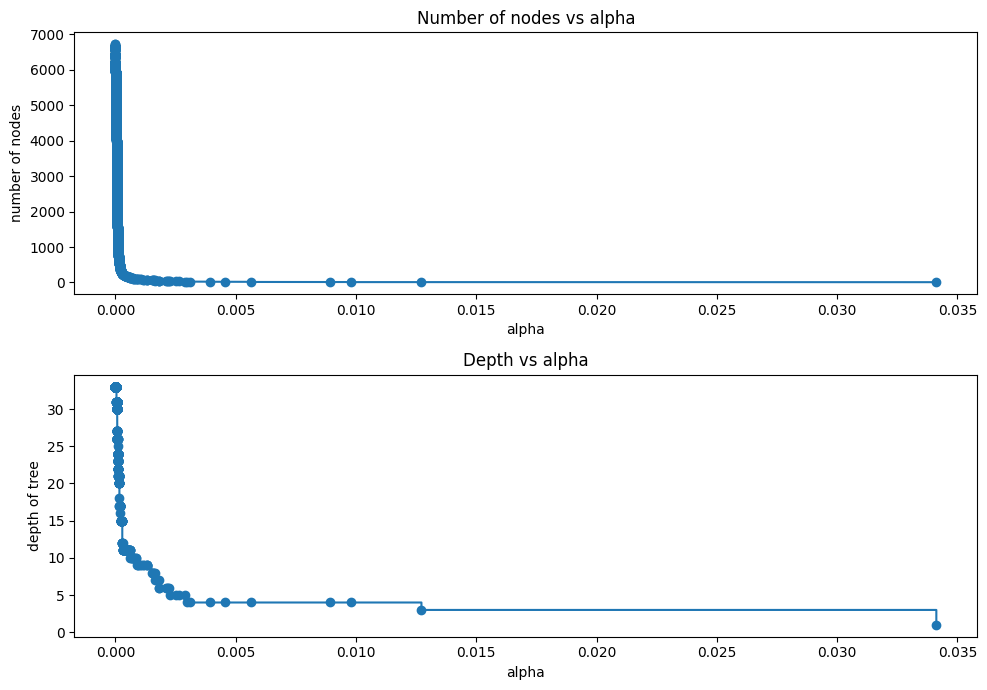

In [142]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [143]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [144]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

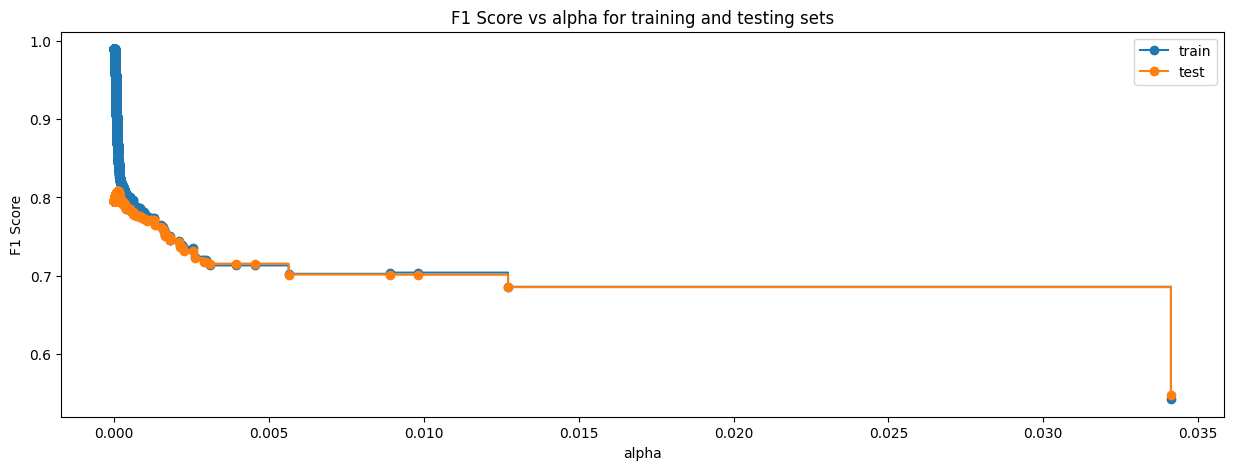

In [145]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [146]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


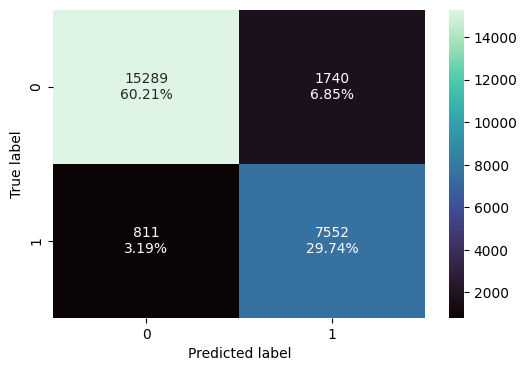

In [147]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [148]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89954 0.90303    0.81274 0.85551

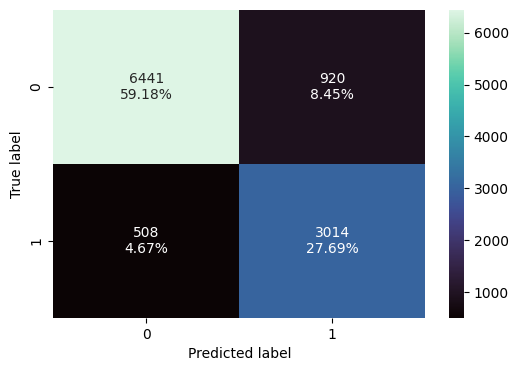

In [149]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [150]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86879 0.85576    0.76614 0.80848

**Observations:**

The model is giving a generalized result on both the train and test data which shows that the model is able to generalize well on unseen data.

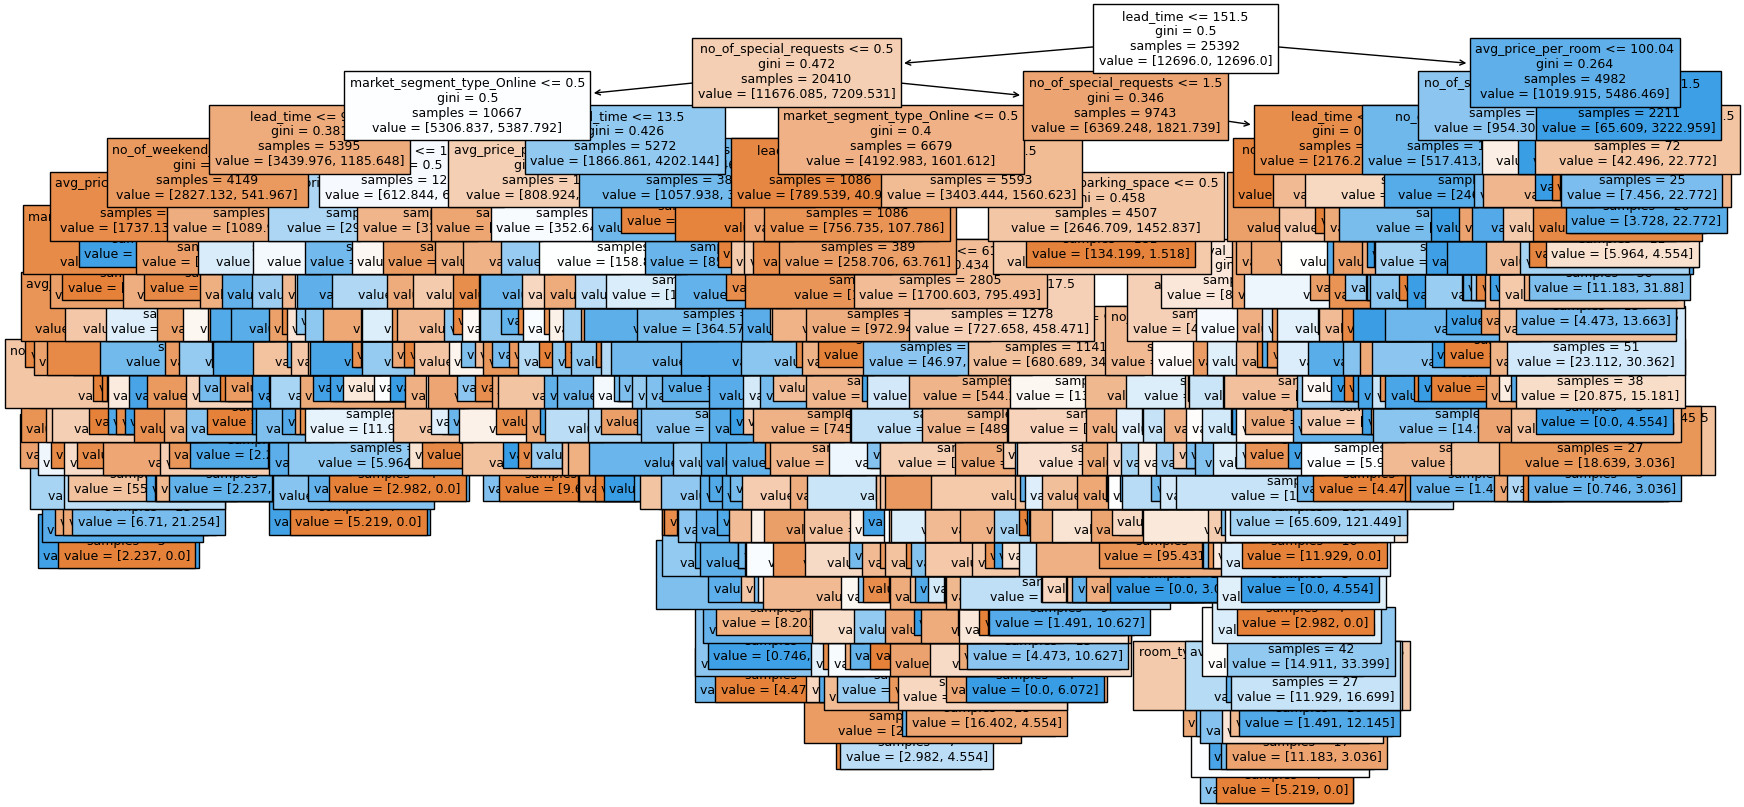

In [151]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [152]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

- We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

**Important Features**

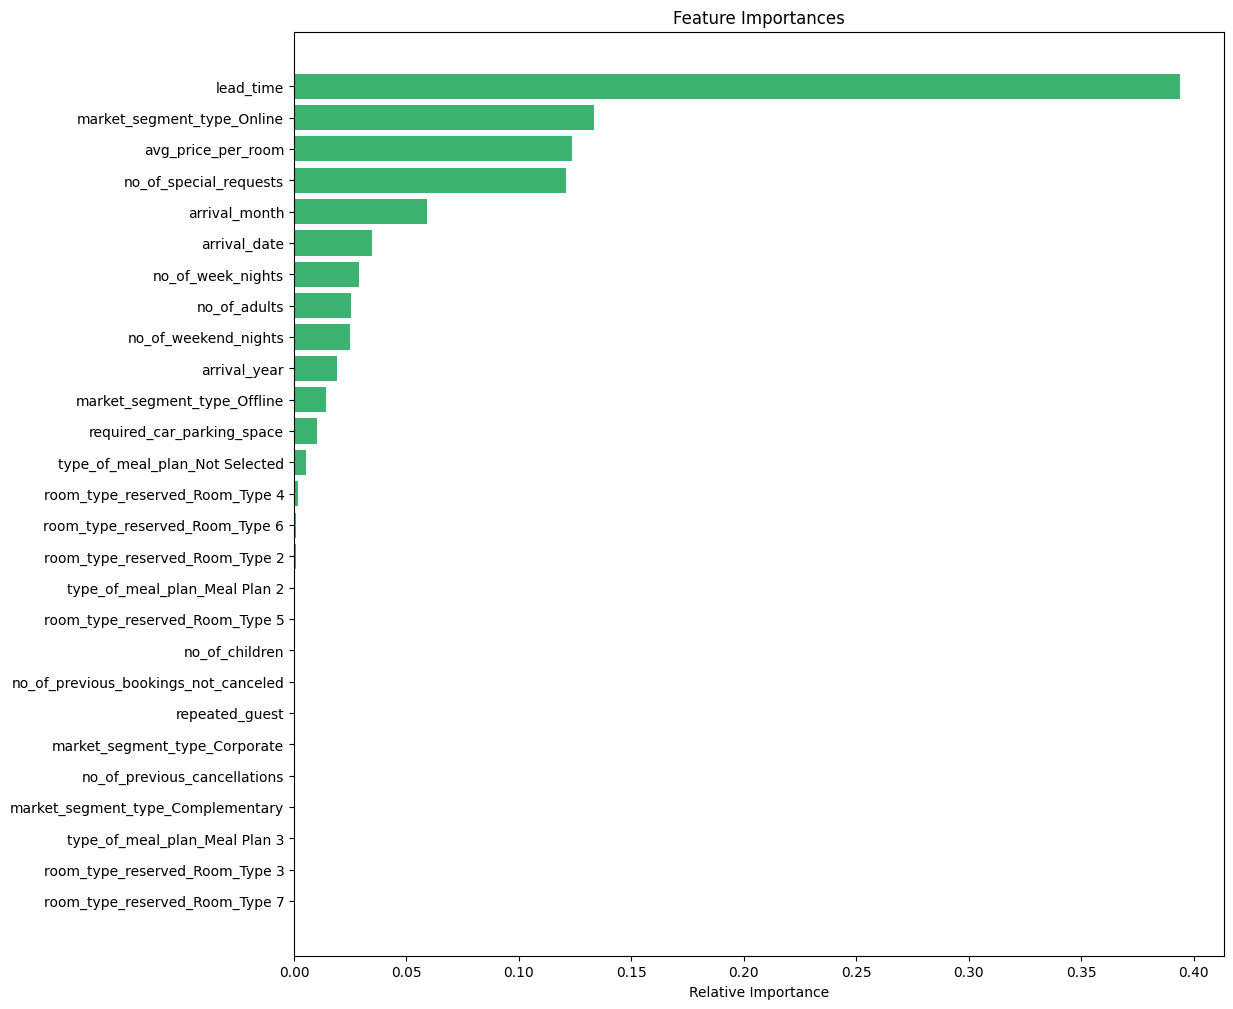

In [153]:
importances = best_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="mediumseagreen", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
The important features are same as Pre-pruned Tree

* lead time
* market segment type (online)
* Average price per room
* no of special requests


## Comparison of Models and Final Model Selection

In [154]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_default.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.83097   
Recall                             0.99510                      0.78608   
Precision                          0.98415                      0.72425   
F1                                 0.98960                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89954  
Recall                          0.90303  
Precision                       0.81274  
F1                              0.85551

In [155]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_default.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87118   
Recall                                0.81175   
Precision                             0.79461   
F1                                    0.80309   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86621                      0.83497   
Recall                             0.80494                      0.78336   
Precision                          0.78663                      0.72758   
F1                                 0.79568                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86879  
Recall                          0.85576  
Precision                       0.76614  
F1                              0.80848

**Observations:**

Based on the provided performance metrics (Accuracy, Recall, Precision, and F1 score), the Decision Tree model without any pruning (Accuracy: 0.87118, Recall: 0.81175, Precision: 0.79461, F1: 0.80309) appears to be the best performing model among the three options. 

However to strike a balance between Recall and Precision for this scenario, we must consider the **Decision Tree model with Post-Pruning**(Accuracy: 0.86879, Recall: 0.85576, Precision: 0.76614, F1: 0.80848) as the best performing model among the three options.

**Accuracy:** Higher accuracy (e.g., 0.86879) indicates better overall prediction of booking cancellations, enabling proactive actions to prevent cancellations or manage them effectively.

**Recall:** Higher recall (e.g., 0.85576) means the model can effectively capture a good proportion of actual cancellations, enabling timely actions to mitigate cancellations and improve customer service.

**Precision:** Higher precision (e.g., 0.76614) suggests fewer false positives, reducing unnecessary actions or costs associated with false cancellation predictions, leading to better customer satisfaction.

**F1 score:** Higher F1 score (e.g., 0.80848) indicates a balanced performance between recall and precision, helping businesses strike a balance between correctly identifying cancellations and minimizing false positives, providing more accurate and reliable predictions for customer satisfaction.

## Actionable Insights and Recommendations
Based on the observations from the EDA, logistic regression, and decision trees, here are some actionable items and recommendations for managing booking cancellations and improving customer satisfaction:

**Pricing Strategy:** Since bookings with higher prices are slightly more likely to be canceled, consider optimizing pricing strategies to ensure they are competitive and aligned with customer expectations.

**Lead Time Management:** Bookings with longer lead times are more likely to be canceled, so consider establishing effective communication channels with customers who have made bookings with longer lead times. Send timely reminders and updates about their bookings, confirmations, and any changes or offers related to their reservations. This can help keep customers engaged and informed, reducing the chances of cancellations.

**Market Segment Targeting:** Bookings from the online market segment have the highest cancellation rate, so focus on understanding the underlying reasons and tailor marketing efforts or customer engagement strategies accordingly to improve the conversion of online bookings.

**Special Requests Management:** Bookings with 3 or more special requests show 0 cancellations, indicating that fulfilling special requests may positively impact customer satisfaction and reduce cancellations. Ensure efficient handling of special requests and prioritize customer preferences.

**Family Bookings Management:** Bookings that include 4 family members have a high cancellation rate of approximately 40%, so consider offering family-friendly amenities, packages, or discounts to incentivize family bookings and reduce cancellations.

**Parking Space Management**:The required car parking space is found to be negatively correlated with booking cancellations. Consider providing convenient and sufficient parking facilities to reduce cancellations and enhance customer satisfaction.

**Repeat Guest Recognition**: Guests with a history of repeat visits are less likely to cancel bookings. Implement loyalty programs or personalized offers to incentivize repeat visits and enhance guest retention.

**Previous Cancellation History:** Bookings with a history of previous cancellations are more likely to be canceled again. Monitor and manage customers with a history of cancellations closely, and proactively address any potential concerns or issues to prevent further cancellations.


**Meal Plan Selection:** Customers who have not selected any meal plan are more likely to cancel bookings. Encourage customers to select a meal plan and clearly communicate the benefits to reduce cancellations and improve revenue from additional services.

**Further analysis** on the children count exceeding the usual count and bookings with children not accompanied by adults can provide valuable insights into the booking patterns and customer behavior. Additionally, examining why the average price per room is 0 EUR for the market segments of complementary and corporate can also provide important information about pricing strategies and potential issues with data accuracy or data entry.

Overall, a proactive approach to pricing, lead time management, market segment targeting, special requests handling, family bookings management, parking space management, repeat guest recognition, previous cancellation history management, and meal plan selection can help reduce booking cancellations and enhance customer satisfaction. 

Regular monitoring of important features, such as lead time, market segment type, average price per room, and number of special requests, can also provide valuable insights for ongoing optimization of booking cancellation management strategies.